In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel('C:/Users/Juan Carlos/Desktop/apuntes/Base de datos limpia para trabajo.xlsx')

In [3]:
df.columns.tolist()

['Estado',
 'Municipio',
 'Sexo',
 'Edad',
 'Bloque_edad',
 'Aprobación_presidencial',
 'Aprovación_presidencial_codificado',
 'Aprobación_gobernador',
 'Aprovación_gobernador_codificado',
 'Voto_en_2018',
 'Voto_en_2018_codificado',
 'PAN_Percepción',
 'PAN_Percepción_codificado',
 'PRI_Percepción',
 'PRI_Percepción_codificado',
 'PRD_Percepción',
 'PRD_Percepción_codificado',
 'PV_Percepción',
 'PV_Percepción_codificado',
 'PT_Percepción',
 'PT_Percepción_codificado',
 'MC_Percepción',
 'MC_Percepción_codificado',
 'MORENA_Percepción',
 'PES_Percepción',
 'PES_Percepción_codificado',
 'RSP_Percepción',
 'RSP_Percepción_codificado',
 'FxM_Percepción',
 'FxM_Percepción_codificado',
 'Intención_del_voto_diputados',
 'Intención_Diputados_codificado',
 'Preferencia_PAN',
 'Preferencia_PAN_codificado',
 'Preferencia_PRI',
 'Preferencia_PRI_codificado',
 'Preferencia_PRD',
 'Preferencia_PRD_codificado',
 'Preferencia_PV',
 'Preferencia_PV_codificado',
 'Preferencia_PT',
 'Preferencia_PT_cod

In [4]:
nulos = df.isnull().sum()

In [5]:
nulos[nulos.values>0]

Series([], dtype: int64)

In [6]:
columnas_con_nulos = nulos[nulos.values > 0]
columnas_con_nulos.sort_values(ascending=True)

Series([], dtype: int64)

## Tratamiento de columnas

In [7]:
columnas_numericas = df._get_numeric_data().columns.tolist() 
print(columnas_numericas)

['Edad', 'Aprovación_presidencial_codificado', 'Aprovación_gobernador_codificado', 'Voto_en_2018_codificado', 'PAN_Percepción_codificado', 'PRI_Percepción_codificado', 'PRD_Percepción_codificado', 'PV_Percepción_codificado', 'PT_Percepción_codificado', 'MC_Percepción_codificado', 'PES_Percepción_codificado', 'RSP_Percepción_codificado', 'FxM_Percepción_codificado', 'Intención_Diputados_codificado', 'Preferencia_PAN_codificado', 'Preferencia_PRI_codificado', 'Preferencia_PRD_codificado', 'Preferencia_PV_codificado', 'Preferencia_PT_codificado', 'Preferencia_MC_codificado', 'Preferencia_MORENA_codificado', 'Preferencia_PES_codificado', 'Preferencia_RSP_codificado', 'Preferencia_FxM_codificado', 'Partido_no_votaría_codificado', 'Identidad_partidista_codificado', 'Nivel_de_participación_codificado', 'Semáforo_rojo_codificado', 'Semáforo_naranja_codificado', 'Semáforo_amarillo_codificado', 'Confianza_INE_codificado', 'Confianza_TRIFE_codificado', 'Confianza_televisoras_codificado', 'Confian

In [8]:
df_num = df[columnas_numericas].copy()
df_num.head()

,Edad,Aprovación_presidencial_codificado,Aprovación_gobernador_codificado,Voto_en_2018_codificado,PAN_Percepción_codificado,PRI_Percepción_codificado,PRD_Percepción_codificado,PV_Percepción_codificado,PT_Percepción_codificado,MC_Percepción_codificado,...,Utilizó_twitter_codificado,Utilizó_Facebook_codificado,Utilizó_Instagram_codificado,Utilizó_Youtube_codificado,Utilizó_Whatsapp_codificado,Beneficiario_codificado,Escolaridad_codificado,Ocupación_codificado,Estado_civil_codificado,Tiene_hijos_codificado
0,33,4,4,1,4,1,1,2,1,2,...,0,1,1,1,1,0,4,3,1,2
1,22,3,3,97,3,2,1,3,3,3,...,0,1,1,1,1,0,4,8,1,1
2,67,2,2,1,3,2,0,0,0,2,...,0,1,0,1,1,0,5,8,5,1
3,38,4,3,1,3,2,3,2,2,2,...,0,1,0,0,1,1,7,4,2,1
4,35,2,1,5,2,2,2,0,0,0,...,0,1,0,1,1,0,12,99,2,99


In [9]:
# Obtenemos columnas categóricas
columnas_categoricas = df.drop(columns=columnas_numericas).columns.tolist()
print(columnas_categoricas)

['Estado', 'Municipio', 'Sexo', 'Bloque_edad', 'Aprobación_presidencial', 'Aprobación_gobernador', 'Voto_en_2018', 'PAN_Percepción', 'PRI_Percepción', 'PRD_Percepción', 'PV_Percepción', 'PT_Percepción', 'MC_Percepción', 'MORENA_Percepción', 'PES_Percepción', 'RSP_Percepción', 'FxM_Percepción', 'Intención_del_voto_diputados', 'Preferencia_PAN', 'Preferencia_PRI', 'Preferencia_PRD', 'Preferencia_PV', 'Preferencia_PT', 'Preferencia_MC', 'Preferencia_MORENA', 'Preferencia_PES', 'Preferencia_RSP', 'Preferencia_FxM', 'Partido_no_votaría', 'Identidad_partidista', 'Fecha_de_la_elección', 'Nivel_de_Participación', 'Semáforo_rojo', 'Semáforo_naranja', 'Semáforo_amarillo', 'Confianza_INE', 'Confianza_TRIFE', 'Confianza_televisoras', 'Confianza_periódicos', 'Confianza_redes_sociales', 'Confianza_Cámara_de_Diputados', 'Confianza_Guardia_nacional', 'Confianza_ejército', 'Confianza_polícía', 'Confianza_jueces', 'Utiliza_internet', 'Utilizó_twitter', 'Utilizó_Facebook', 'Utilizó_Instagram', 'Utilizó_Y

In [10]:
df_categ = df[columnas_categoricas].copy()
df_categ.head()

,Estado,Municipio,Sexo,Bloque_edad,Aprobación_presidencial,Aprobación_gobernador,Voto_en_2018,PAN_Percepción,PRI_Percepción,PRD_Percepción,...,Estado_civil,Tiene_hijos,AMAI-Cuartos,AMAI-Baños_completos,AMAI-Regadera,AMAI-Focos,AMAI-Piso,AMAI-Automóviles,AMAI-Estufa,Ecolaridad_jefe_de_familia
0,BAJA CALIFORNIA,ENSENADA,Masculino,De 26 a 35 años,Aprueba mucho,Aprueba mucho,Partido Acción Nacional (PAN ),Muy buena,Muy mala,Muy mala,...,Soltera/o,No,1,1,No tiene,0 a 5,Tierra o cemento,0,Si tiene,Secundaria Incompleta
1,BAJA CALIFORNIA,TECATE,Femenino,De 18 a 25 años,Aprueba algo,Aprueba algo,No votó,Buena,Mala,Muy mala,...,Soltera/o,Sí,4,1,Si tiene,0 a 5,Tierra o cemento,0,Si tiene,Secundaria Incompleta
2,BAJA CALIFORNIA,TECATE,Femenino,Más de 60 años,Desaprueba algo,Desaprueba algo,Partido Acción Nacional (PAN ),Buena,Mala,Ns/nc,...,Viuda/o,Sí,3,1,Si tiene,0 a 5,Tierra o cemento,0,Si tiene,Preparatoria Completa
3,BAJA CALIFORNIA,TECATE,Femenino,De 36 a 45 años,Aprueba mucho,Aprueba algo,Partido Acción Nacional (PAN ),Buena,Mala,Buena,...,Casada/o,Sí,3,1,No tiene,6 a 10,Tierra o cemento,1,Si tiene,Secundaria Completa
4,BAJA CALIFORNIA,TIJUANA,Masculino,De 26 a 35 años,Desaprueba algo,Desaprueba mucho,Movimiento Regeneración Nacional (MORENA),Mala,Mala,Mala,...,Casada/o,Ns/nc,No contesta,No contesta,No contesta,No contesta,No contesta,No contesta,No contesta,No contesta


In [11]:
df_categ.head()

,Estado,Municipio,Sexo,Bloque_edad,Aprobación_presidencial,Aprobación_gobernador,Voto_en_2018,PAN_Percepción,PRI_Percepción,PRD_Percepción,...,Estado_civil,Tiene_hijos,AMAI-Cuartos,AMAI-Baños_completos,AMAI-Regadera,AMAI-Focos,AMAI-Piso,AMAI-Automóviles,AMAI-Estufa,Ecolaridad_jefe_de_familia
0,BAJA CALIFORNIA,ENSENADA,Masculino,De 26 a 35 años,Aprueba mucho,Aprueba mucho,Partido Acción Nacional (PAN ),Muy buena,Muy mala,Muy mala,...,Soltera/o,No,1,1,No tiene,0 a 5,Tierra o cemento,0,Si tiene,Secundaria Incompleta
1,BAJA CALIFORNIA,TECATE,Femenino,De 18 a 25 años,Aprueba algo,Aprueba algo,No votó,Buena,Mala,Muy mala,...,Soltera/o,Sí,4,1,Si tiene,0 a 5,Tierra o cemento,0,Si tiene,Secundaria Incompleta
2,BAJA CALIFORNIA,TECATE,Femenino,Más de 60 años,Desaprueba algo,Desaprueba algo,Partido Acción Nacional (PAN ),Buena,Mala,Ns/nc,...,Viuda/o,Sí,3,1,Si tiene,0 a 5,Tierra o cemento,0,Si tiene,Preparatoria Completa
3,BAJA CALIFORNIA,TECATE,Femenino,De 36 a 45 años,Aprueba mucho,Aprueba algo,Partido Acción Nacional (PAN ),Buena,Mala,Buena,...,Casada/o,Sí,3,1,No tiene,6 a 10,Tierra o cemento,1,Si tiene,Secundaria Completa
4,BAJA CALIFORNIA,TIJUANA,Masculino,De 26 a 35 años,Desaprueba algo,Desaprueba mucho,Movimiento Regeneración Nacional (MORENA),Mala,Mala,Mala,...,Casada/o,Ns/nc,No contesta,No contesta,No contesta,No contesta,No contesta,No contesta,No contesta,No contesta


In [12]:
corr = df_num.corr()
corr

,Edad,Aprovación_presidencial_codificado,Aprovación_gobernador_codificado,Voto_en_2018_codificado,PAN_Percepción_codificado,PRI_Percepción_codificado,PRD_Percepción_codificado,PV_Percepción_codificado,PT_Percepción_codificado,MC_Percepción_codificado,...,Utilizó_twitter_codificado,Utilizó_Facebook_codificado,Utilizó_Instagram_codificado,Utilizó_Youtube_codificado,Utilizó_Whatsapp_codificado,Beneficiario_codificado,Escolaridad_codificado,Ocupación_codificado,Estado_civil_codificado,Tiene_hijos_codificado
Edad,1.000000,0.042514,-0.038035,-0.182204,-0.165312,-0.086198,-0.167879,-0.186726,-0.182217,-0.232777,...,0.061551,-0.035648,-0.008243,-0.002452,-0.071005,0.047058,-0.209393,0.091844,0.066611,-0.077933
Aprovación_presidencial_codificado,0.042514,1.000000,0.326218,-0.195840,-0.023447,-0.101916,0.103143,0.057199,0.115524,0.059841,...,-0.030473,0.010852,-0.015852,-0.003776,0.027428,-0.030287,-0.031609,-0.012439,-0.003406,0.003019
Aprovación_gobernador_codificado,-0.038035,0.326218,1.000000,-0.119844,0.122707,0.138003,0.165248,0.112717,0.130551,0.108849,...,-0.014455,-0.027776,0.007967,-0.017253,-0.022338,-0.026382,-0.037381,-0.025395,-0.000341,-0.042039
Voto_en_2018_codificado,-0.182204,-0.195840,-0.119844,1.000000,-0.006541,-0.035307,-0.043726,-0.030213,-0.047277,0.014207,...,-0.020294,0.006579,0.042240,-0.008512,-0.008958,0.042554,0.021774,0.038073,-0.007299,0.045583
PAN_Percepción_codificado,-0.165312,-0.023447,0.122707,-0.006541,1.000000,0.405094,0.330598,0.289340,0.240095,0.299393,...,0.005139,-0.005540,0.002324,-0.031673,0.015689,0.026418,0.030824,-0.061100,-0.022464,-0.024047
PRI_Percepción_codificado,-0.086198,-0.101916,0.138003,-0.035307,0.405094,1.000000,0.313004,0.239600,0.182226,0.199847,...,0.039029,0.027399,0.049759,0.032570,-0.003215,0.053168,-0.066765,-0.031959,-0.030015,-0.030509
PRD_Percepción_codificado,-0.167879,0.103143,0.165248,-0.043726,0.330598,0.313004,1.000000,0.414357,0.432979,0.397557,...,-0.023768,0.012173,0.016454,0.002864,0.036368,0.031276,0.024779,-0.040001,-0.020597,-0.014155
PV_Percepción_codificado,-0.186726,0.057199,0.112717,-0.030213,0.289340,0.239600,0.414357,1.000000,0.544544,0.436056,...,-0.018817,-0.018839,0.019018,-0.024222,0.019768,-0.064073,0.028038,-0.070993,-0.006824,-0.042174
PT_Percepción_codificado,-0.182217,0.115524,0.130551,-0.047277,0.240095,0.182226,0.432979,0.544544,1.000000,0.536289,...,-0.018322,0.019126,0.048706,0.017179,0.018082,-0.057129,0.048387,-0.088722,-0.014917,-0.039164
MC_Percepción_codificado,-0.232777,0.059841,0.108849,0.014207,0.299393,0.199847,0.397557,0.436056,0.536289,1.000000,...,-0.013760,-0.008600,-0.000375,0.031999,0.028493,-0.055325,0.075230,-0.090259,-0.022936,-0.028935


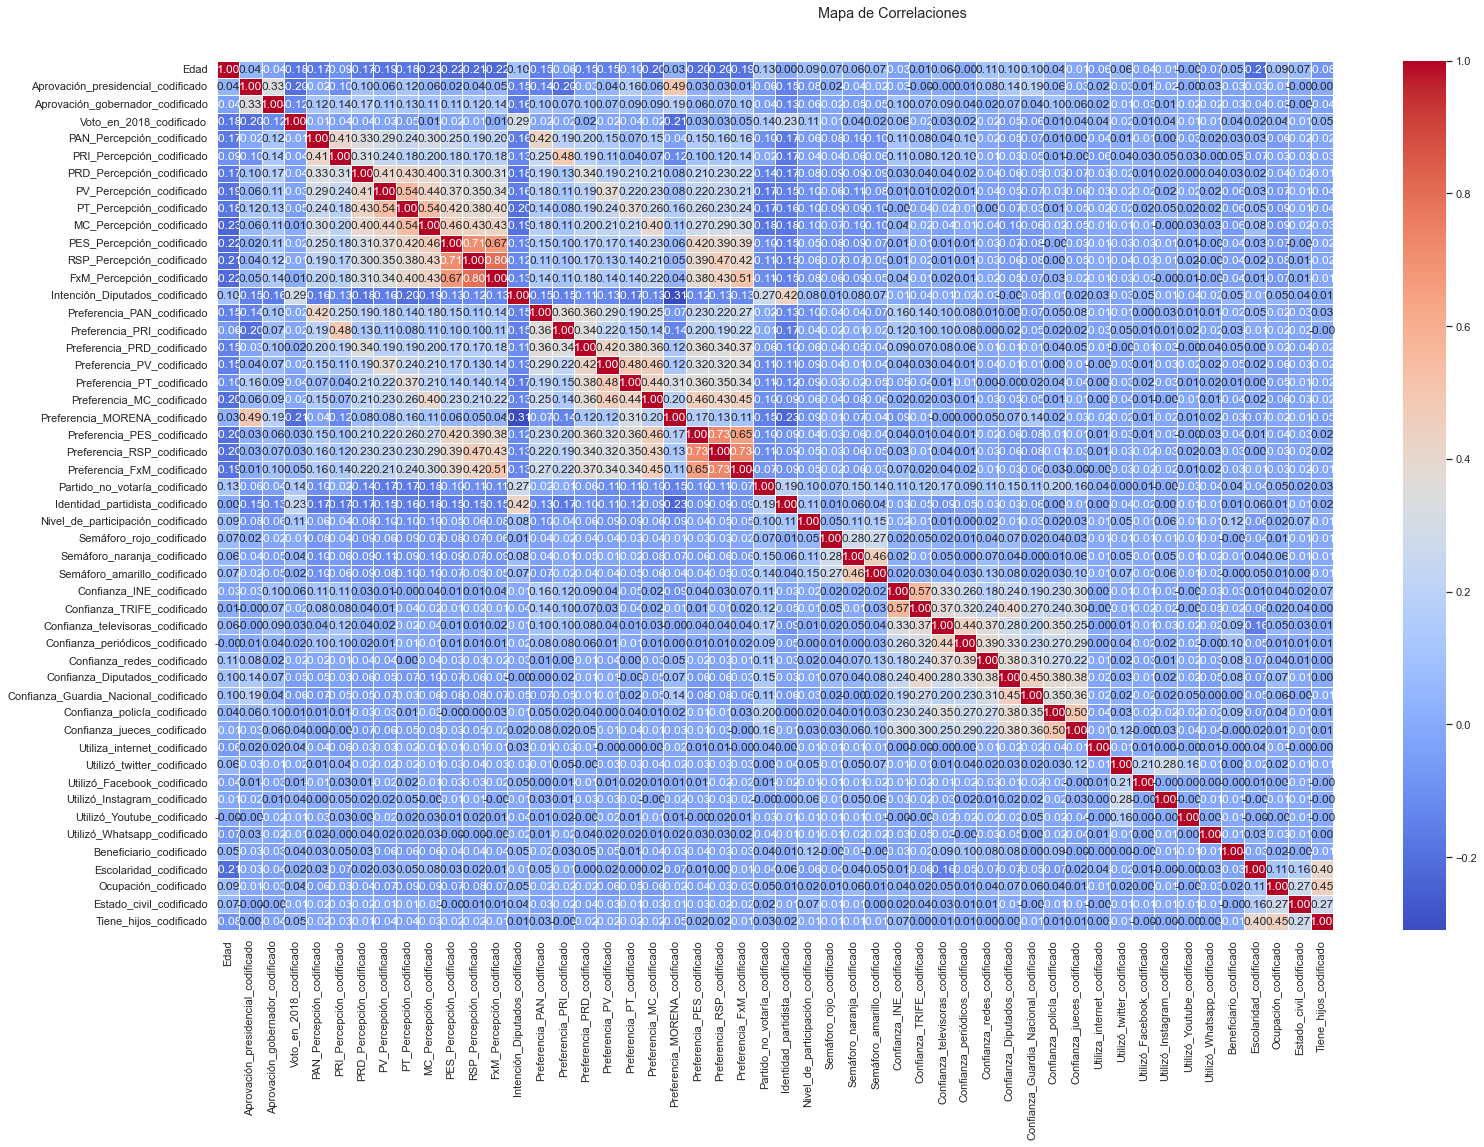

In [13]:
sns.set()

fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
fig.subplots_adjust(top=0.93)
fig.suptitle('Mapa de Correlaciones');

In [14]:
"""Nuesto mapa de calor nos muestra que, en ralidad, no hay una gran correlación entre los datos. No obstante
hay algunas zonas del mapa que parecen etener un poco mayor de correlación y serán exploradas"""

'Nuesto mapa de calor nos muestra que, en ralidad, no hay una gran correlación entre los datos. No obstante\nhay algunas zonas del mapa que parecen etener un poco mayor de correlación y serán exploradas'

## Se cubre la parte superior del mapa

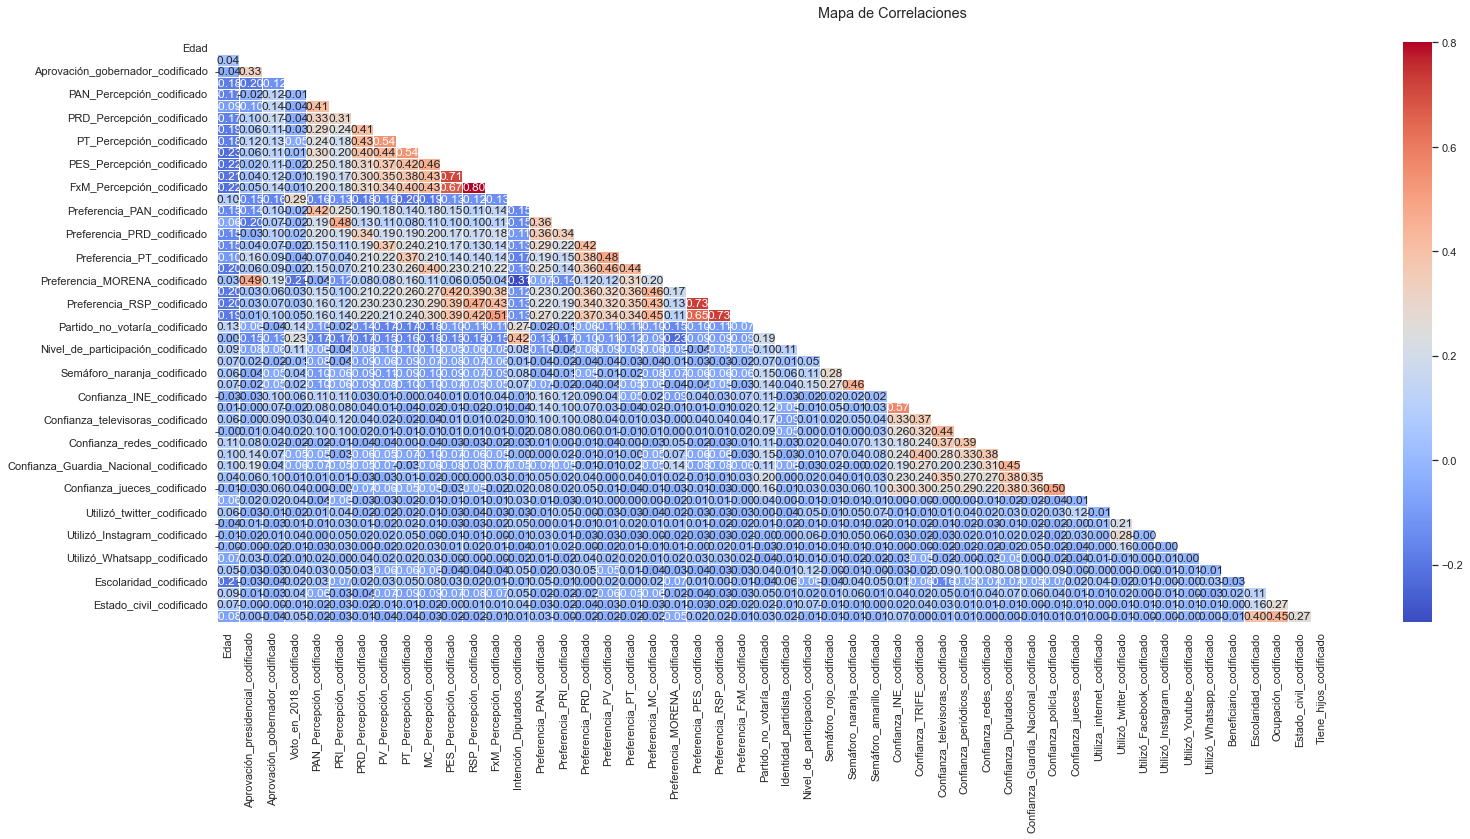

In [15]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(25, 10))
  sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
              fmt='.2f', linewidths=0.5, mask=mask)
  fig.subplots_adjust(top=0.93)
  fig.suptitle('Mapa de Correlaciones')

In [16]:
def mapa_de_calor(corr):
    """Gráfica un mapa de calor de correlaciones escondiendo
    el triángulo superior."""
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style('white'):
        fig, ax = plt.subplots(figsize=(25, 10))
        sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
        fmt='.2f', linewidths=0.5, mask=mask)
        fig.subplots_adjust(top=1)
        fig.suptitle('Mapa de Correlaciones')

In [17]:
n_columnas = 10
columnas = corr.nlargest(n_columnas, 'Aprovación_presidencial_codificado')['Aprovación_presidencial_codificado'].index
columnas

Index(['Aprovación_presidencial_codificado', 'Preferencia_MORENA_codificado',
       'Aprovación_gobernador_codificado',
       'Confianza_Guardia_Nacional_codificado', 'Preferencia_PT_codificado',
       'Confianza_Diputados_codificado', 'PT_Percepción_codificado',
       'PRD_Percepción_codificado', 'Confianza_redes_codificado',
       'Preferencia_MC_codificado'],
      dtype='object')

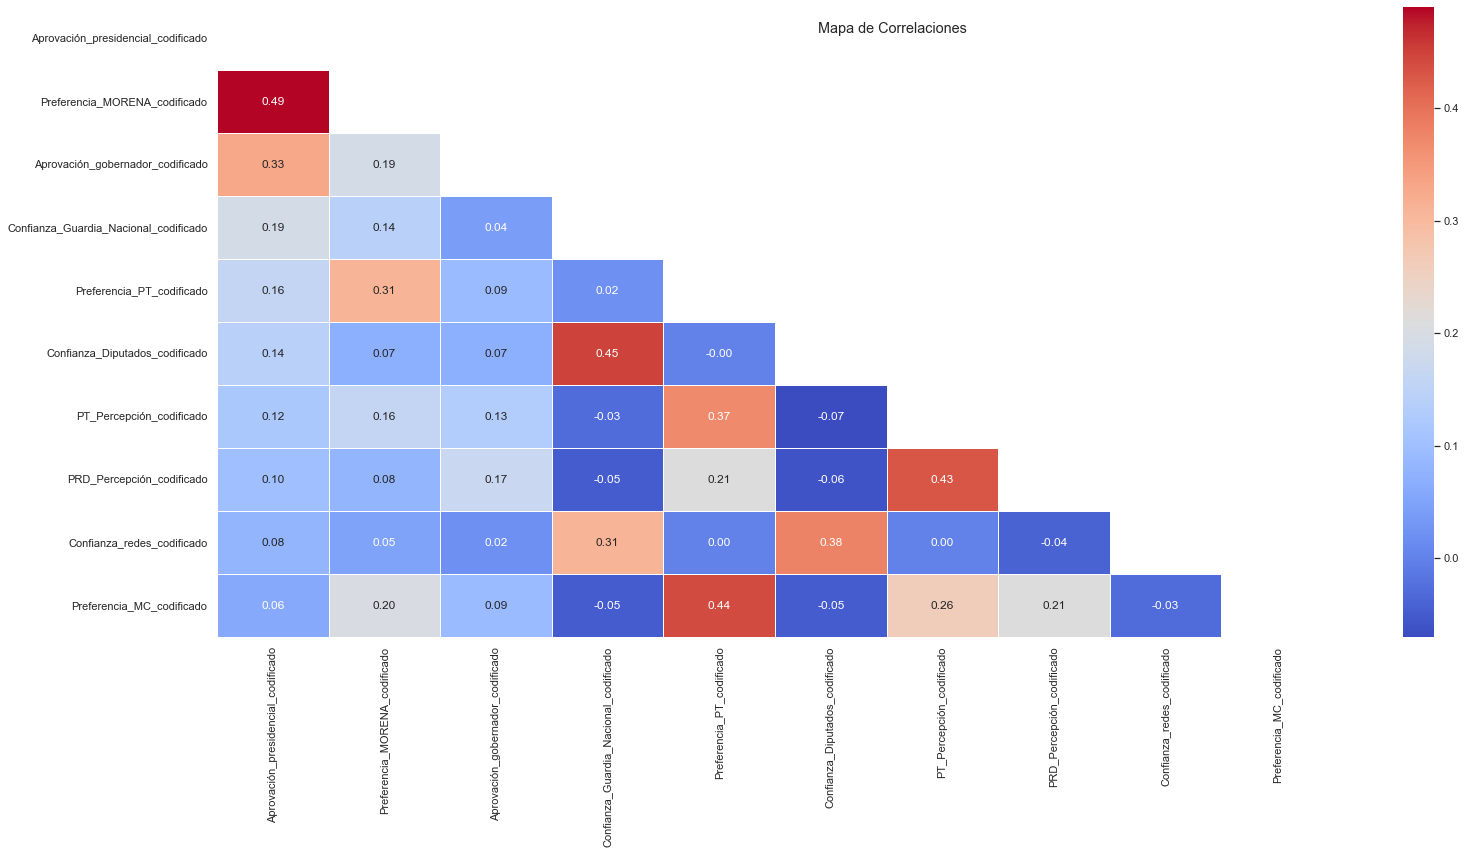

In [18]:
correlaciones = df_num[columnas].corr()
mapa_de_calor(correlaciones)

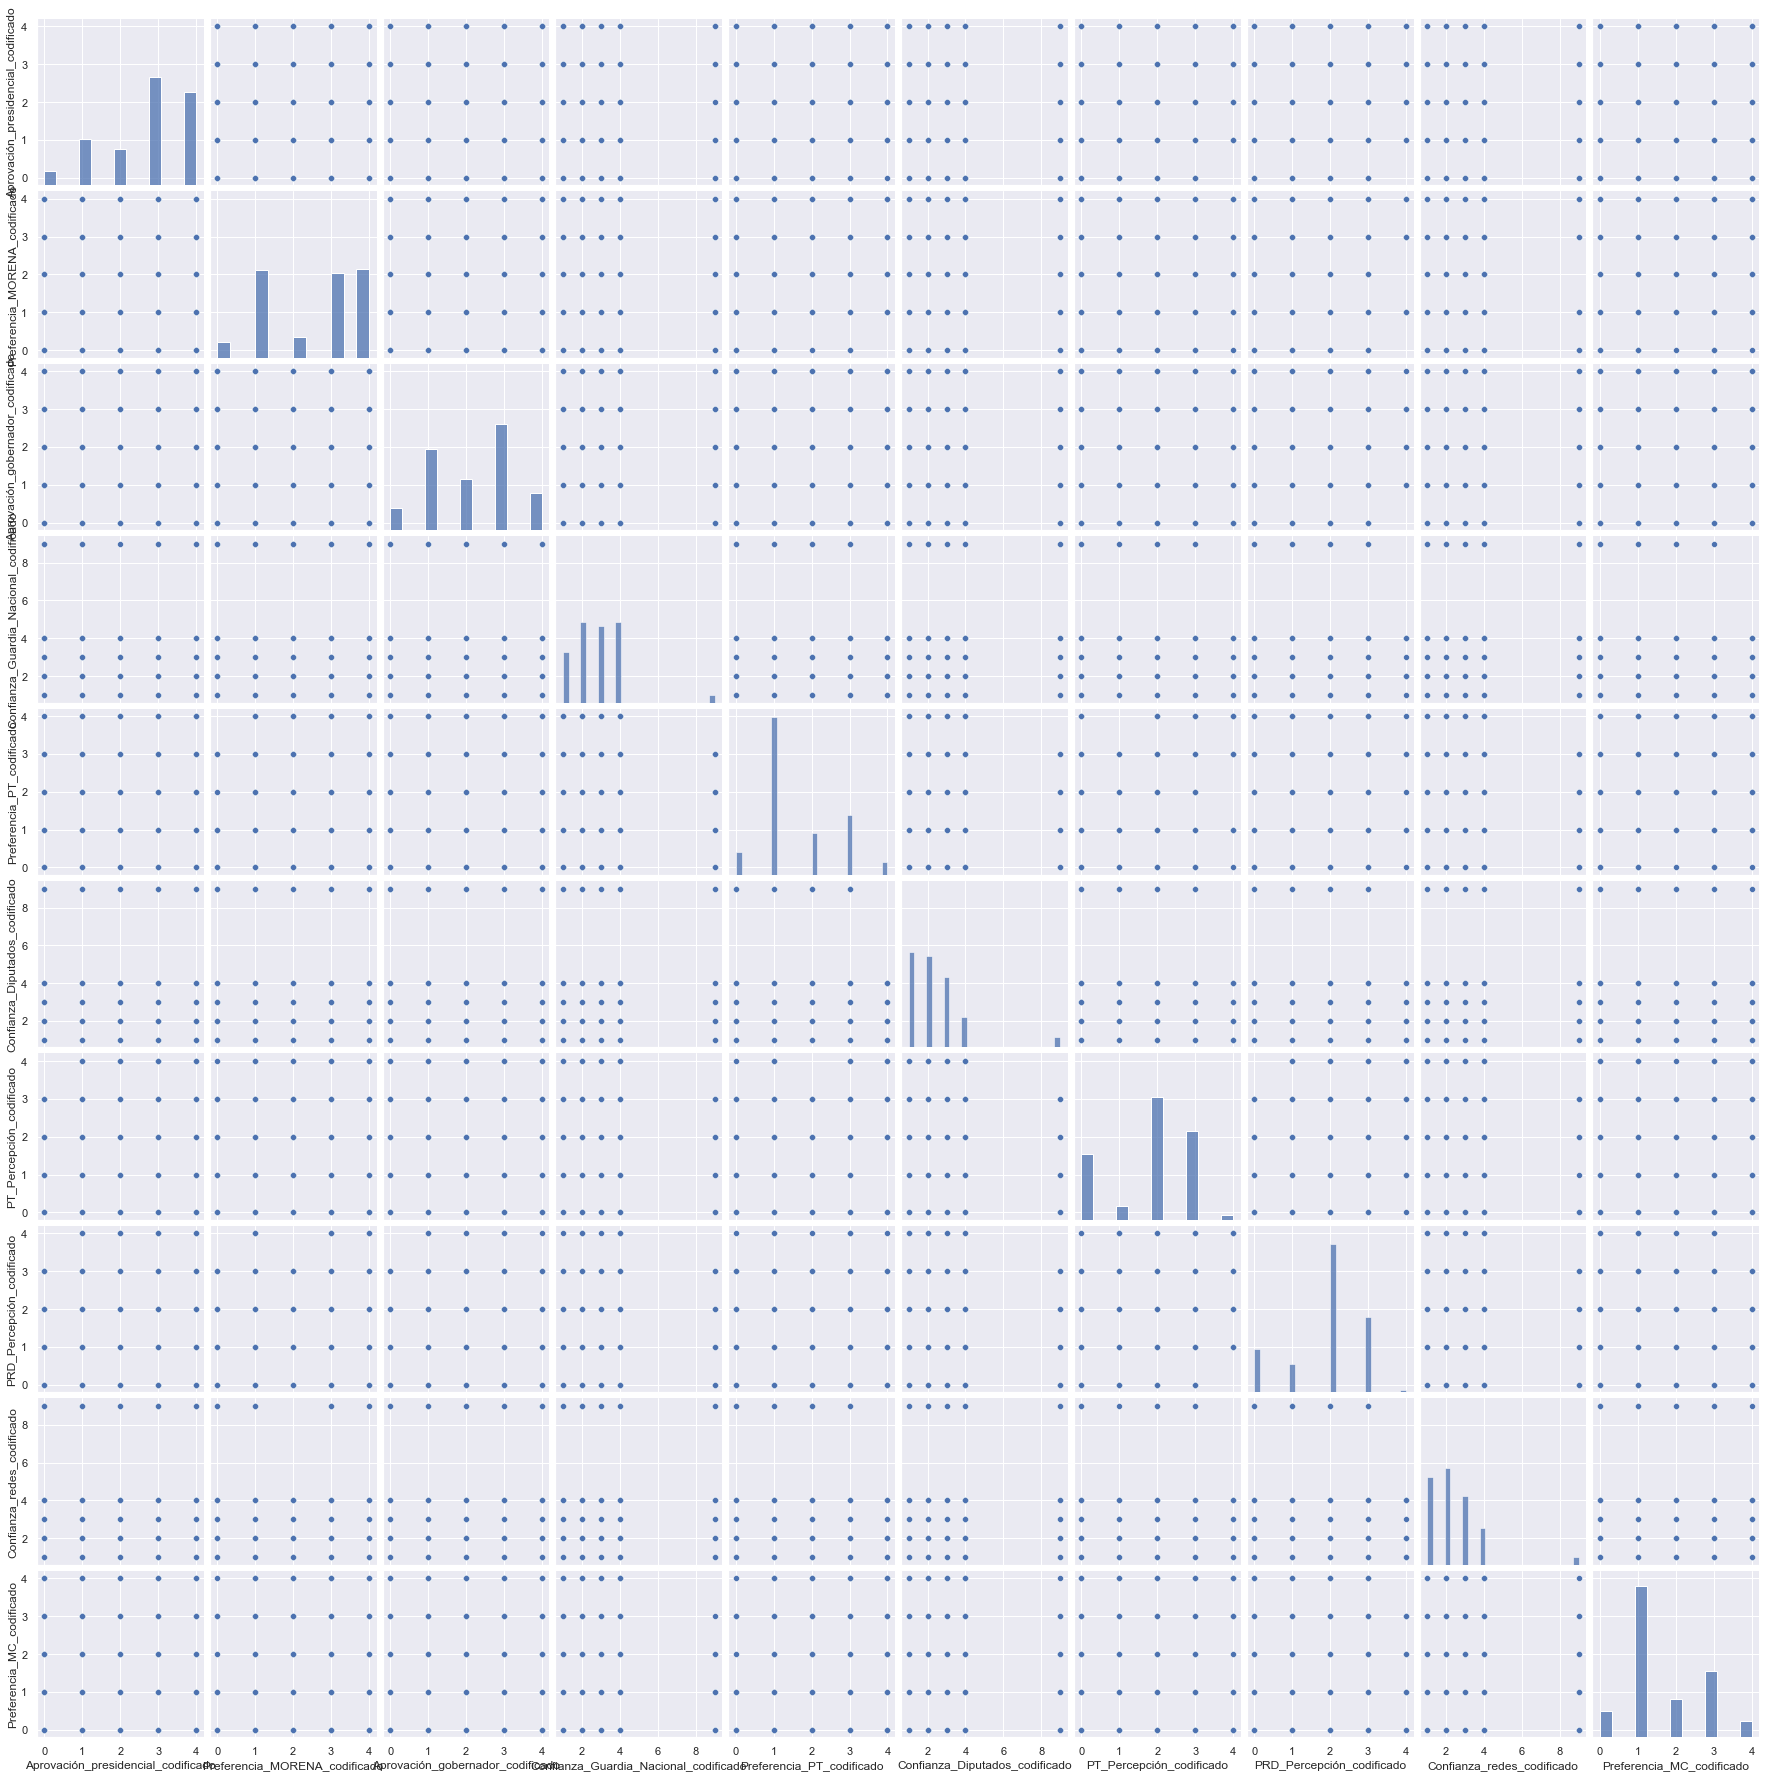

In [19]:
sns.pairplot(df[columnas]);

In [20]:
"""No hay una correlación muy fuerte entre los datos. La máxima correlación es de .73. La correlación más fierte se observa
entre la preferencia entre al partido FxM y los partidos PES y RSP. También se observa una correlación fuerte entre 
el RSP y  el PES. Esto se explica  porque, al ser partidos nuevos, podrían ser atractivos para ciertos grupos cansados 
de los partidos tradicionales y podrían verse beneficiados por ello """

'No hay una correlación muy fuerte entre los datos. La máxima correlación es de .73. La correlación más fierte se observa\nentre la preferencia entre al partido FxM y los partidos PES y RSP. También se observa una correlación fuerte entre \nel RSP y  el PES. Esto se explica  porque, al ser partidos nuevos, podrían ser atractivos para ciertos grupos cansados \nde los partidos tradicionales y podrían verse beneficiados por ello '

In [21]:
"""También se observa una correlación negativa entre MORENA y los PAN y PRI. Eso es natural, pues son opositores."""

'También se observa una correlación negativa entre MORENA y los PAN y PRI. Eso es natural, pues son opositores.'

In [22]:
"""También hay una correlación positiva entre la percepción PES y PAN. Esto se explica porque ambos acaparan el voto de derecha
institucional"""

'También hay una correlación positiva entre la percepción PES y PAN. Esto se explica porque ambos acaparan el voto de derecha\ninstitucional'

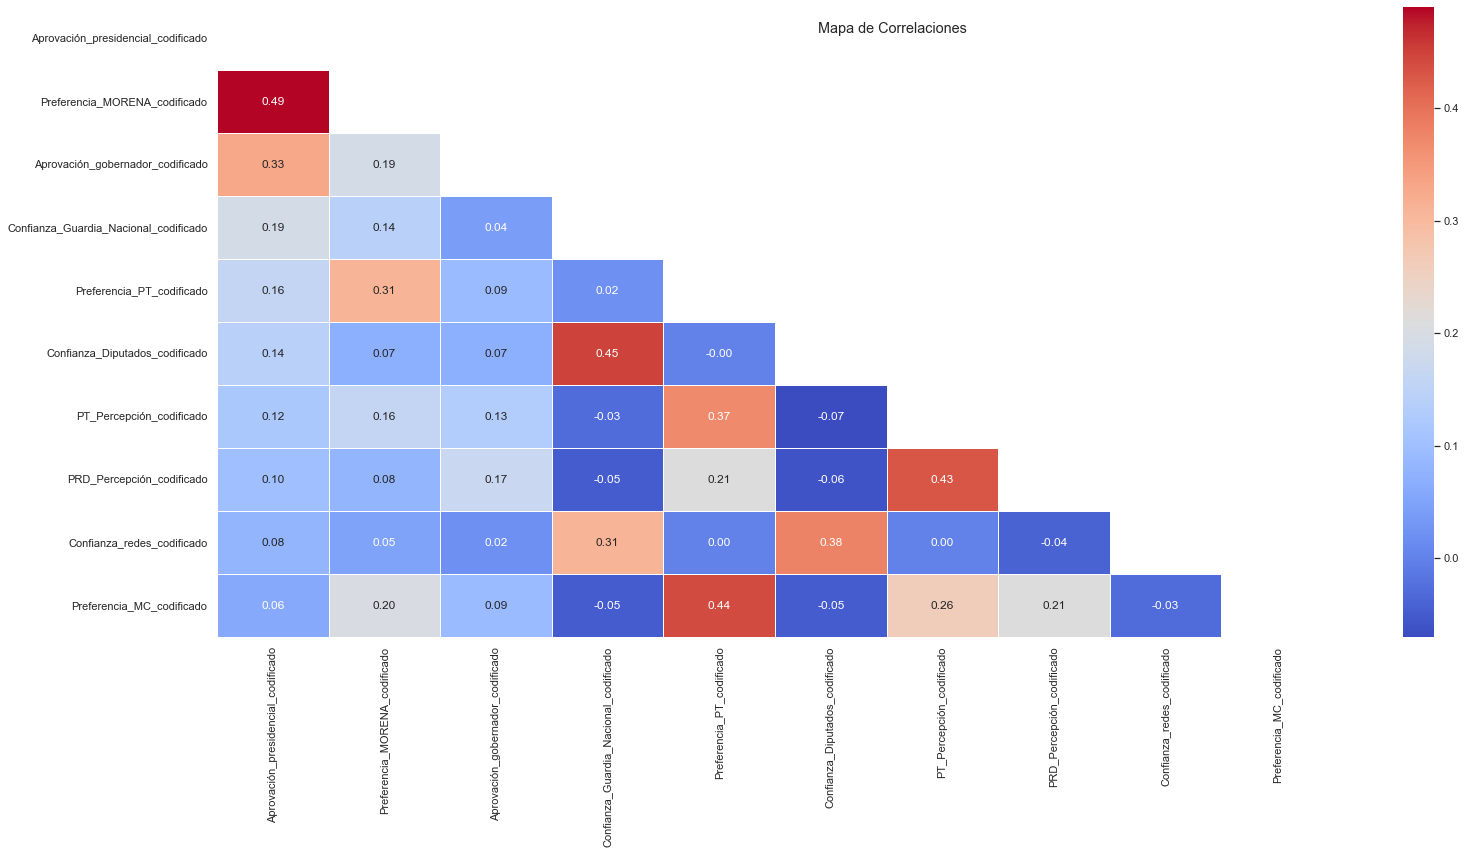

In [23]:
n_columnas = 10
columnas_top_10 = correlaciones.nlargest(n_columnas, 'Aprovación_presidencial_codificado')['Aprovación_presidencial_codificado'].index
correlaciones = df_num[columnas_top_10].corr()
mapa_de_calor(correlaciones)

In [24]:
"""En este segundo cuadro se obervan algunas correlaciones entre la confianza entre  ejército y guardia nacional, 
y la confianza que hay entre el INE y el TRIFE. La primera puede suiceder porque ambas tienen una formación militar
por lo que al haber confianza en una es posible que haya confianza en la otra. En el INE y el TRIFE, al ser organismos 
que suelen colaborar juntos y  con independencia el ejecutivo, mientras que hay confianza en uno también se sostiene la
confianza en el otro"""

'En este segundo cuadro se obervan algunas correlaciones entre la confianza entre  ejército y guardia nacional, \ny la confianza que hay entre el INE y el TRIFE. La primera puede suiceder porque ambas tienen una formación militar\npor lo que al haber confianza en una es posible que haya confianza en la otra. En el INE y el TRIFE, al ser organismos \nque suelen colaborar juntos y  con independencia el ejecutivo, mientras que hay confianza en uno también se sostiene la\nconfianza en el otro'

##  Distribución de los datos

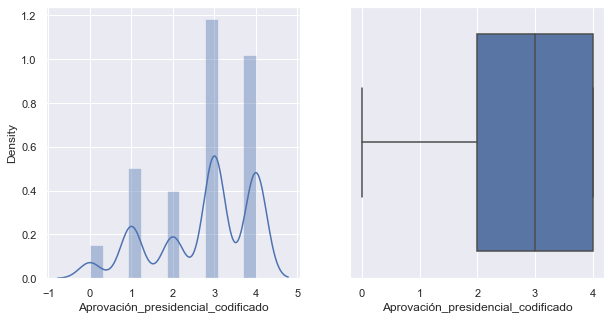

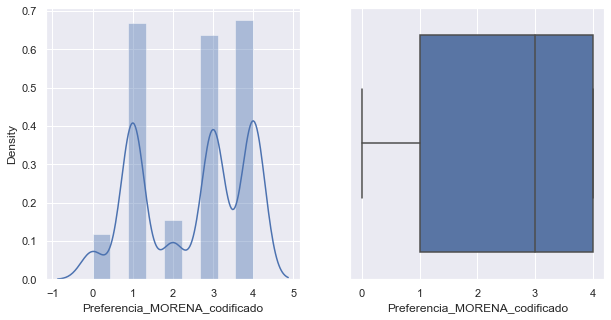

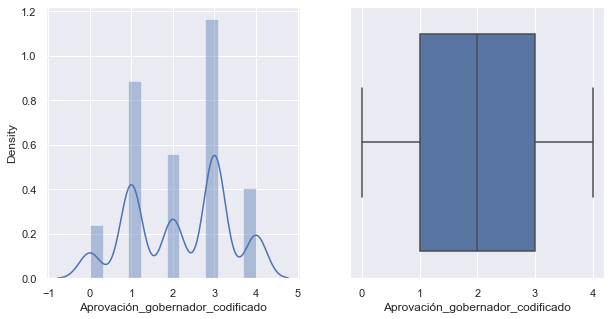

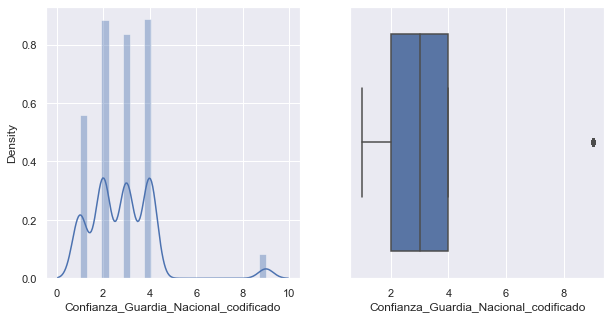

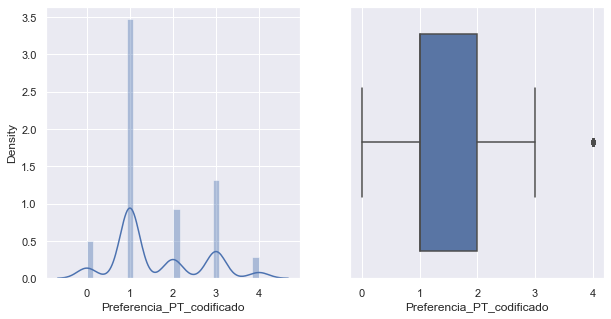

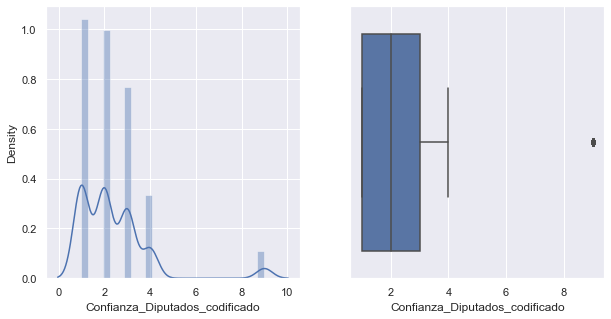

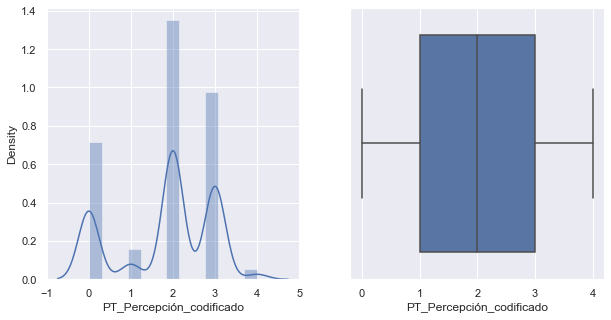

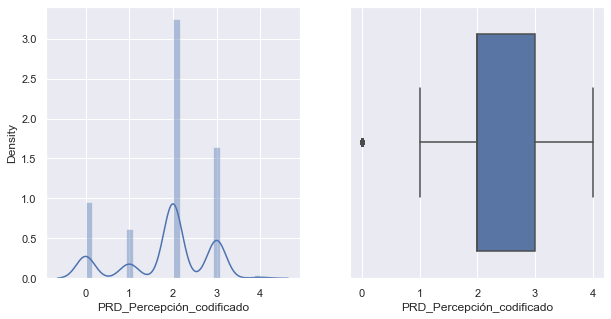

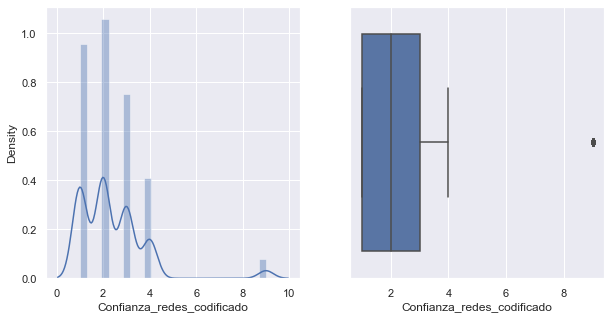

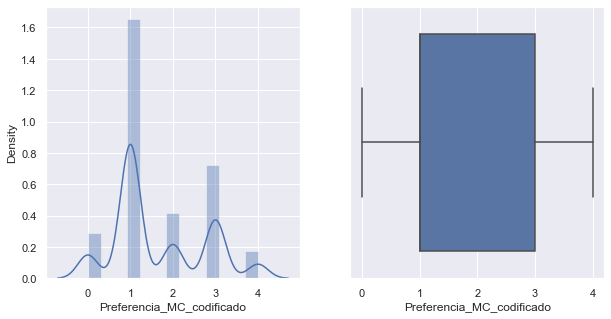

In [25]:
for columna in df_num[columnas_top_10]:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(df_num[columna], kde=True, ax=ax[0])
    sns.boxplot(df_num[columna], orient='h', ax=ax[1]);

<Figure size 432x288 with 0 Axes>

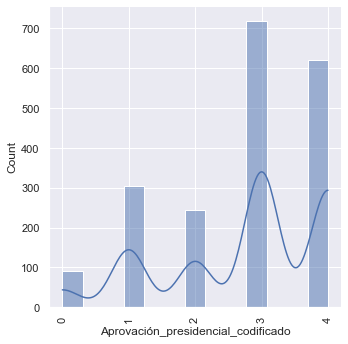

In [26]:
plt.figure()
sns.displot(df_num['Aprovación_presidencial_codificado'], kde=True)
plt.xticks(rotation=90);

In [27]:
df_num['Aprovación_presidencial_codificado'].describe()

count    1980.000000
mean        2.743434
std         1.185576
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Aprovación_presidencial_codificado, dtype: float64

In [28]:
print(f"Cesgo: {df_num['Aprovación_presidencial_codificado'].skew()}")
print(f"Kurtosis: {df_num['Aprovación_presidencial_codificado'].kurt()}")

Cesgo: -0.719832952426756
Kurtosis: -0.5276760450055762


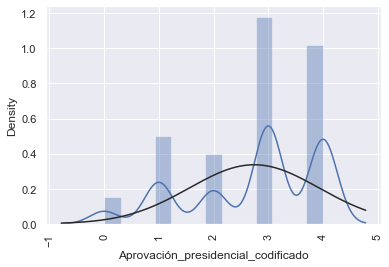

In [29]:
plt.figure()
ax = sns.distplot(df_num['Aprovación_presidencial_codificado'], fit=norm)
plt.xticks(rotation=90);

## Variables categóricas

In [30]:
df_categ.head()

,Estado,Municipio,Sexo,Bloque_edad,Aprobación_presidencial,Aprobación_gobernador,Voto_en_2018,PAN_Percepción,PRI_Percepción,PRD_Percepción,...,Estado_civil,Tiene_hijos,AMAI-Cuartos,AMAI-Baños_completos,AMAI-Regadera,AMAI-Focos,AMAI-Piso,AMAI-Automóviles,AMAI-Estufa,Ecolaridad_jefe_de_familia
0,BAJA CALIFORNIA,ENSENADA,Masculino,De 26 a 35 años,Aprueba mucho,Aprueba mucho,Partido Acción Nacional (PAN ),Muy buena,Muy mala,Muy mala,...,Soltera/o,No,1,1,No tiene,0 a 5,Tierra o cemento,0,Si tiene,Secundaria Incompleta
1,BAJA CALIFORNIA,TECATE,Femenino,De 18 a 25 años,Aprueba algo,Aprueba algo,No votó,Buena,Mala,Muy mala,...,Soltera/o,Sí,4,1,Si tiene,0 a 5,Tierra o cemento,0,Si tiene,Secundaria Incompleta
2,BAJA CALIFORNIA,TECATE,Femenino,Más de 60 años,Desaprueba algo,Desaprueba algo,Partido Acción Nacional (PAN ),Buena,Mala,Ns/nc,...,Viuda/o,Sí,3,1,Si tiene,0 a 5,Tierra o cemento,0,Si tiene,Preparatoria Completa
3,BAJA CALIFORNIA,TECATE,Femenino,De 36 a 45 años,Aprueba mucho,Aprueba algo,Partido Acción Nacional (PAN ),Buena,Mala,Buena,...,Casada/o,Sí,3,1,No tiene,6 a 10,Tierra o cemento,1,Si tiene,Secundaria Completa
4,BAJA CALIFORNIA,TIJUANA,Masculino,De 26 a 35 años,Desaprueba algo,Desaprueba mucho,Movimiento Regeneración Nacional (MORENA),Mala,Mala,Mala,...,Casada/o,Ns/nc,No contesta,No contesta,No contesta,No contesta,No contesta,No contesta,No contesta,No contesta


In [31]:
df_categ.shape

(1980, 64)

Nombre de Columna:  Estado
MÉXICO                 260
CDMX                   180
JALISCO                130
VERACRUZ               130
PUEBLA                 110
GUANAJUATO              90
CHIAPAS                 90
MICHOACÁN               80
NUEVO LEÓN              80
CHIHUAHUA               60
OAXACA                  60
BAJA CALIFORNIA         60
GUERRERO                60
HIDALGO                 50
SAN LUIS POTOSÍ         50
COAHUILA                50
SONORA                  50
SINALOA                 40
YUCATÁN                 40
TABASCO                 40
MORELOS                 30
QUINTANA ROO            30
ZACATECAS               30
TAMAULIPAS              30
QUERÉTARO               30
DURANGO                 30
TLAXCALA                20
AGUASCALIENTES          20
NAYARIT                 20
BAJA CALIFORNIA SUR     10
CAMPECHE                10
COLIMA                  10
Name: Estado, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


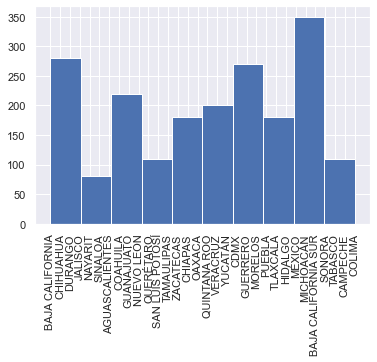

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Municipio
ZAPOPAN                30
TIJUANA                30
BENITO JUAREZ          30
ECATEPEC DE MORELOS    30
JUAREZ                 30
                       ..
MILPA ALTA             10
ALVARO OBREGON         10
XOCHIMILCO             10
MIGUEL HIDALGO         10
CHICOLOAPAN            10
Name: Municipio, Length: 172, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


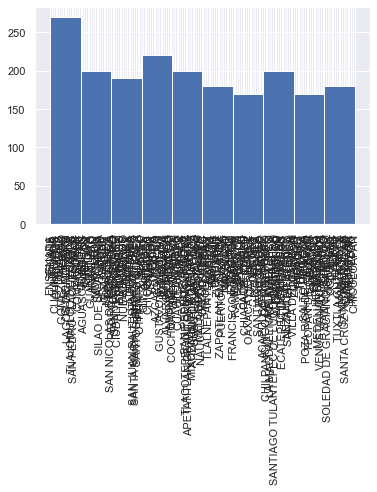

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Sexo
Femenino     1147
Masculino     833
Name: Sexo, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


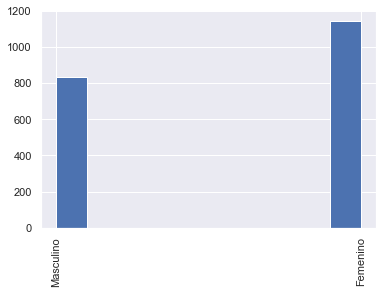

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Bloque_edad
De 46 a 60 años    488
De 26 a 35 años    427
De 18 a 25 años    390
De 36 a 45 años    382
Más de 60 años     293
Name: Bloque_edad, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


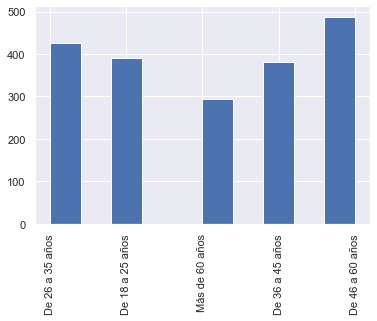

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Aprobación_presidencial
Aprueba algo        719
Aprueba mucho       621
Desaprueba mucho    305
Desaprueba algo     243
 Ns/nc               92
Name: Aprobación_presidencial, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


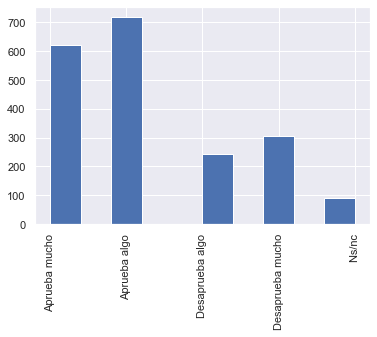

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Aprobación_gobernador
Aprueba algo        708
Desaprueba mucho    539
Desaprueba algo     339
Aprueba mucho       248
 Ns/nc              146
Name: Aprobación_gobernador, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


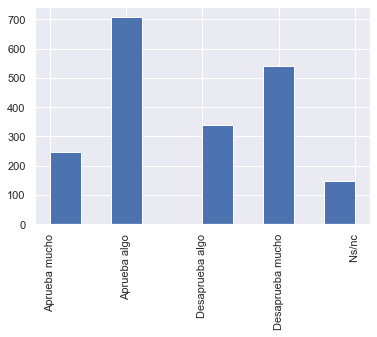

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Voto_en_2018
Movimiento Regeneración Nacional (MORENA)     912
No votó                                       323
Partido Revolucionario Institucional (PRI)    207
Partido Acción Nacional (PAN )                168
No sabe                                       131
No responde                                    89
Partido de la Revolución Democrática (PRD)     48
Movimiento Ciudadano (MC)                      21
Partido del Trabajo (PT)                       20
Anuló/Votó en blanco                           17
Partido Verde Ecologista de México (PVEM)      17
El Bronco como independiente                   16
Nueva Alianza (PANAL)                           5
Otro, ¿cuál?                                    3
Partido Encuentro Social (PES)                  3
Name: Voto_en_2018, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


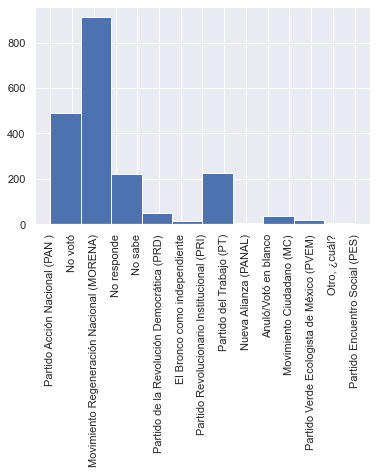

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  PAN_Percepción
Mala         905
Buena        673
Muy mala     186
 Ns/nc       186
Muy buena     30
Name: PAN_Percepción, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


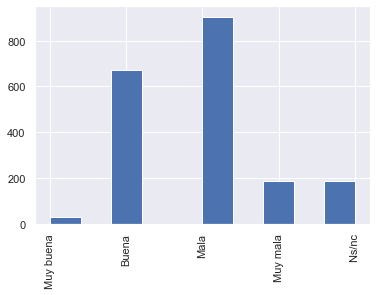

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  PRI_Percepción
Mala         922
Buena        523
Muy mala     380
 Ns/nc       114
Muy buena     41
Name: PRI_Percepción, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


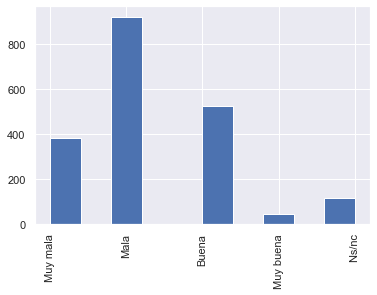

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  PRD_Percepción
Mala         987
Buena        502
 Ns/nc       290
Muy mala     188
Muy buena     13
Name: PRD_Percepción, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


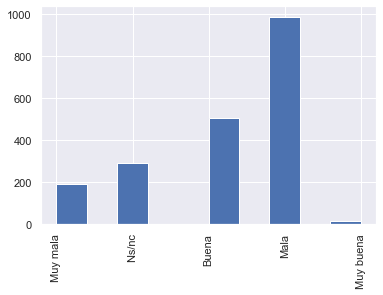

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  PV_Percepción
Mala         795
Buena        687
 Ns/nc       354
Muy mala     120
Muy buena     24
Name: PV_Percepción, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


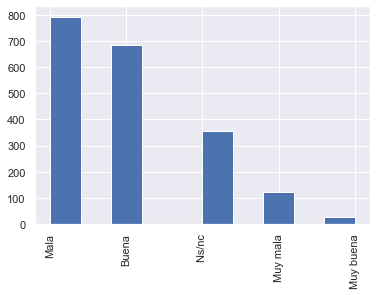

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  PT_Percepción
Mala         822
Buena        594
 Ns/nc       436
Muy mala      96
Muy buena     32
Name: PT_Percepción, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


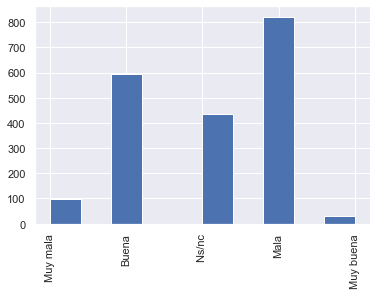

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  MC_Percepción
Mala         709
Buena        636
 Ns/nc       501
Muy mala     100
Muy buena     34
Name: MC_Percepción, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


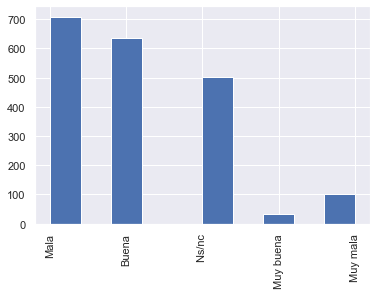

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  MORENA_Percepción
Buena        968
Mala         449
Muy buena    275
Muy mala     169
 Ns/nc       119
Name: MORENA_Percepción, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


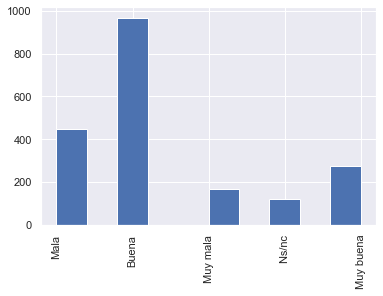

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  PES_Percepción
 Ns/nc       850
Mala         632
Buena        391
Muy mala      87
Muy buena     20
Name: PES_Percepción, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


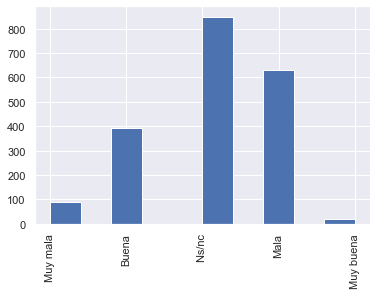

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  RSP_Percepción
 Ns/nc       939
Mala         600
Buena        328
Muy mala      96
Muy buena     17
Name: RSP_Percepción, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


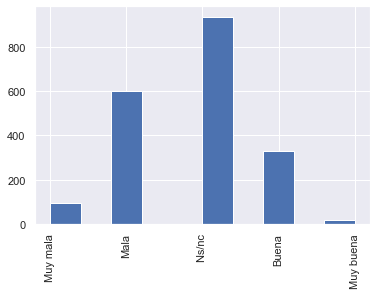

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  FxM_Percepción
 Ns/nc       935
Mala         539
Buena        410
Muy mala      84
Muy buena     12
Name: FxM_Percepción, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


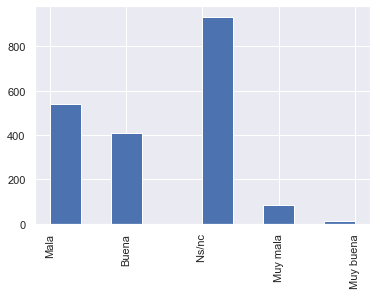

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Intención_del_voto_diputados
MORENA (Movimiento de Regeneración Nacional)    717
No responde                                     568
Partido Revolucionario Institucional (PRI)      224
Partido Acción Nacional (PAN)                   195
Movimiento Ciudadano (MC)                        73
Partido Verde Ecologista de México (PVEM)        63
Partido de la Revolución Democrática (PRD)       46
Partido del Trabajo (PT)                         38
Fuerza por México                                23
Redes Sociales Progresistas (RSP)                17
Partido Encuentro Solidario (PES)                16
Name: Intención_del_voto_diputados, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


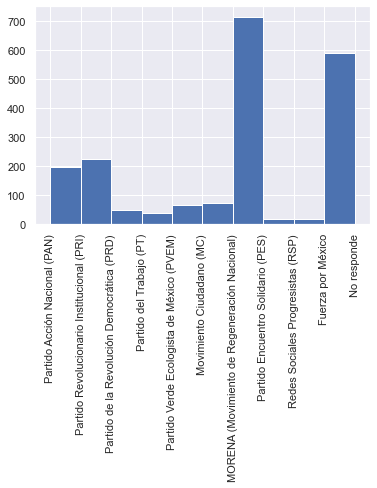

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Preferencia_PAN
Definitivamente no votaría    957
Posiblemente sí votaría       529
Posiblemente no votaría       195
Definitivamente si votaría    192
Ns/nc                         107
Name: Preferencia_PAN, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


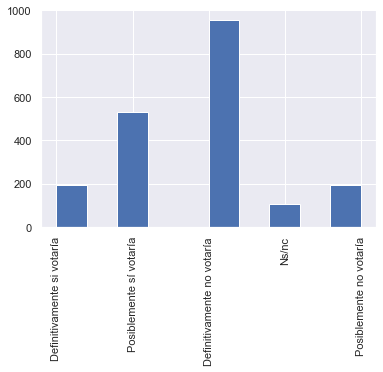

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Preferencia_PRI
Definitivamente no votaría    1119
Posiblemente sí votaría        364
Posiblemente no votaría        211
Definitivamente si votaría     192
Ns/nc                           94
Name: Preferencia_PRI, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


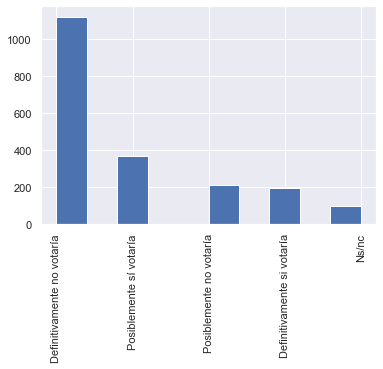

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Preferencia_PRD
Definitivamente no votaría    1161
Posiblemente sí votaría        331
Posiblemente no votaría        268
Ns/nc                          133
Definitivamente si votaría      87
Name: Preferencia_PRD, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


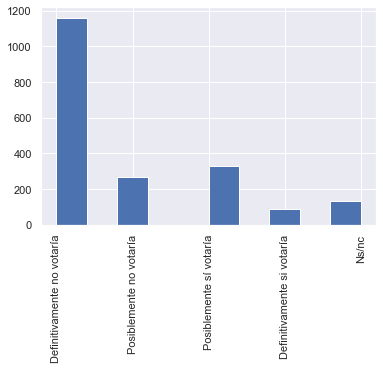

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Preferencia_PV
Definitivamente no votaría    1027
Posiblemente sí votaría        487
Posiblemente no votaría        220
Ns/nc                          145
Definitivamente si votaría     101
Name: Preferencia_PV, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


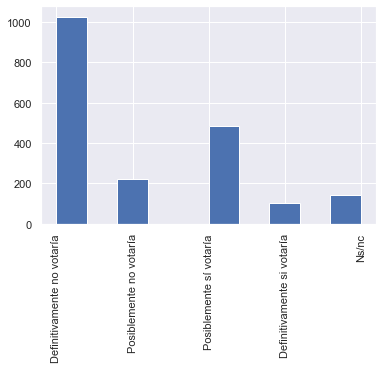

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Preferencia_PT
Definitivamente no votaría    1056
Posiblemente sí votaría        402
Posiblemente no votaría        282
Ns/nc                          153
Definitivamente si votaría      87
Name: Preferencia_PT, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


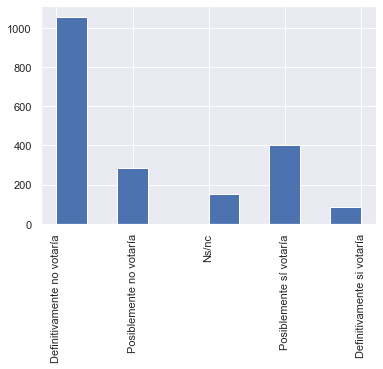

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Preferencia_MC
Definitivamente no votaría    1006
Posiblemente sí votaría        439
Posiblemente no votaría        254
Ns/nc                          175
Definitivamente si votaría     106
Name: Preferencia_MC, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


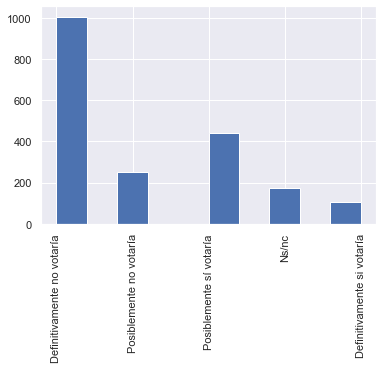

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Preferencia_MORENA
Definitivamente si votaría    594
Definitivamente no votaría    587
Posiblemente sí votaría       561
Posiblemente no votaría       135
Ns/nc                         103
Name: Preferencia_MORENA, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


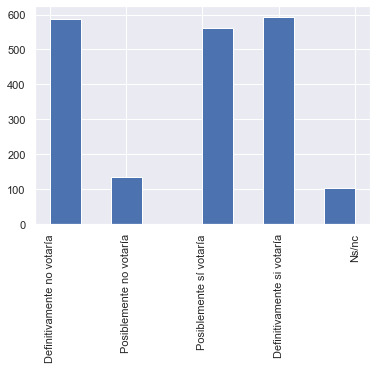

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Preferencia_PES
Definitivamente no votaría    1024
Ns/nc                          407
Posiblemente no votaría        252
Posiblemente sí votaría        239
Definitivamente si votaría      58
Name: Preferencia_PES, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


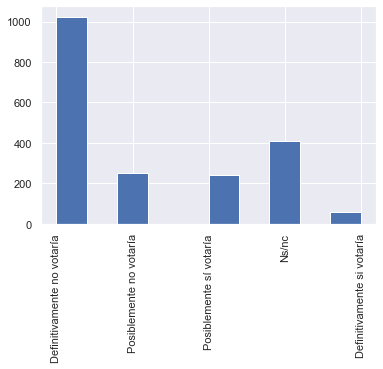

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Preferencia_RSP
Definitivamente no votaría    1012
Ns/nc                          457
Posiblemente no votaría        248
Posiblemente sí votaría        212
Definitivamente si votaría      51
Name: Preferencia_RSP, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


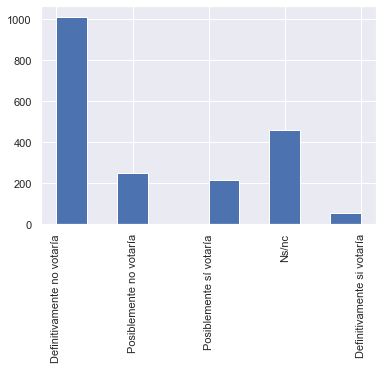

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Preferencia_FxM
Definitivamente no votaría    963
Ns/nc                         467
Posiblemente sí votaría       262
Posiblemente no votaría       209
Definitivamente si votaría     79
Name: Preferencia_FxM, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


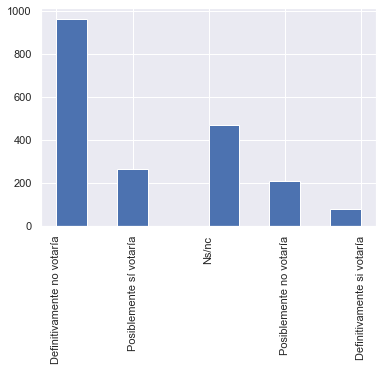

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Partido_no_votaría
Partido Revolucionario Institucional (PRI)      788
Partido Acción Nacional (PAN)                   280
MORENA (Movimiento de Regeneración Nacional)    260
No sabe                                         190
Partido de la Revolución Democrática (PRD)      110
Ninguno                                          85
Partido del Trabajo (PT)                         67
Partido Verde Ecologista de México (PVEM)        44
No responde                                      43
Partido Encuentro Solidario (PES)                31
Movimiento Ciudadano (MC)                        30
Redes Sociales Progresistas (RSP)                21
Fuerza por México                                18
Otro, ¿cuál?                                     13
Name: Partido_no_votaría, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


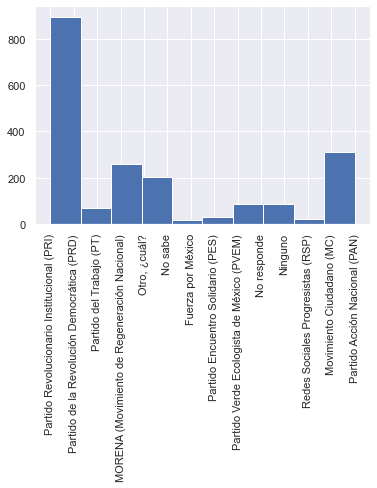

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Identidad_partidista
Muy MORENA                          428
Ninguno o independiente             405
Algo MORENA                         289
Algo panista                        164
Algo priista                        150
Muy priista                         129
Muy panista                          99
No responde                          68
Algo Movimiento Ciudadano            44
Algo Verde Ecologista                36
Muy Verde Ecologista                 28
Algo perredista                      27
Muy perredista                       19
Algo PT-ista                         19
Muy Movimiento Ciudadano             18
Muy PT-ista                          11
Algo Fuerza por México               10
Algo Partido Encuentro Solidario      9
Muy Partido Encuentro Solidario       6
Muy Redes Sociales Progresistas       6
Muy Fuerza por México                 5
Otro, ¿cuál?                          5
Algo Redes Sociale

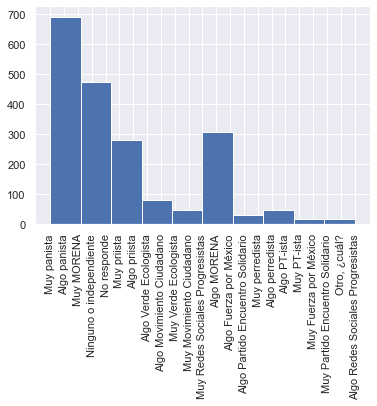

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Fecha_de_la_elección
6 junio         1221
No sabe          378
Junio            272
Otro, ¿cuál?      98
No responde       11
Name: Fecha_de_la_elección, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


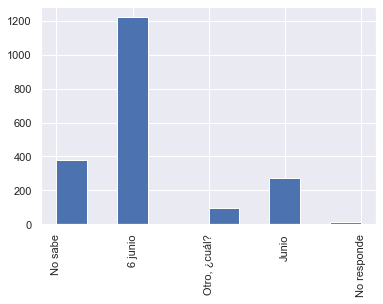

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Nivel_de_Participación
Estoy totalmente seguro/a de ir a votar    1165
Es altamente probable que vaya a votar      434
Es poco probable que vaya a votar           262
No voy a ir a votar                          83
 No sabe                                     29
 No responde                                  7
Name: Nivel_de_Participación, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


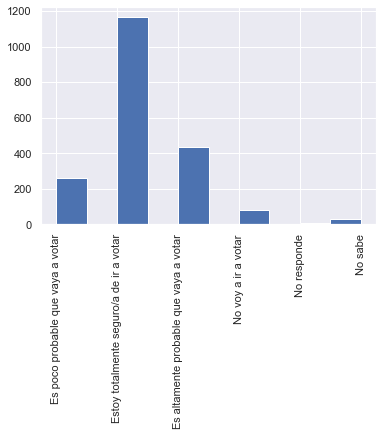

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Semáforo_rojo
No       1101
Sí        831
Ns/nc      48
Name: Semáforo_rojo, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


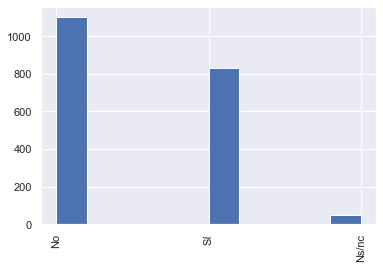

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Semáforo_naranja
Sí       1337
No        604
Ns/nc      39
Name: Semáforo_naranja, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


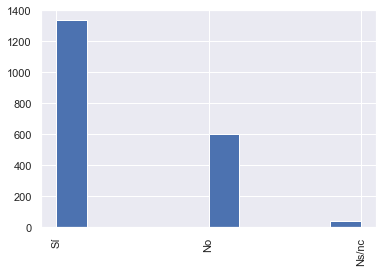

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Semáforo_amarillo
Sí       1683
No        271
Ns/nc      26
Name: Semáforo_amarillo, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


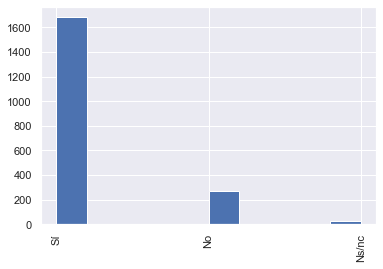

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Confianza_INE
Poco      540
Algo      535
Mucho     451
Nada      416
 Ns/nc     38
Name: Confianza_INE, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


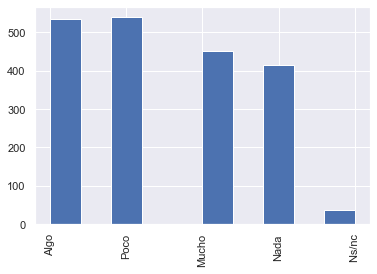

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Confianza_TRIFE
Poco      624
Algo      558
Nada      414
Mucho     328
 Ns/nc     56
Name: Confianza_TRIFE, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


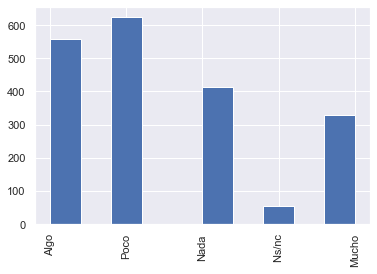

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Confianza_televisoras
Nada      794
Poco      645
Algo      362
Mucho     153
 Ns/nc     26
Name: Confianza_televisoras, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


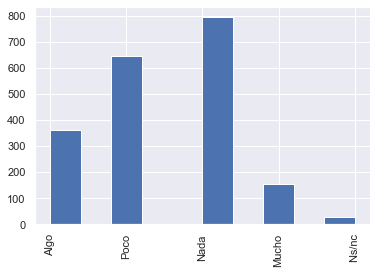

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Confianza_periódicos
Poco      682
Nada      639
Algo      458
Mucho     157
 Ns/nc     44
Name: Confianza_periódicos, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


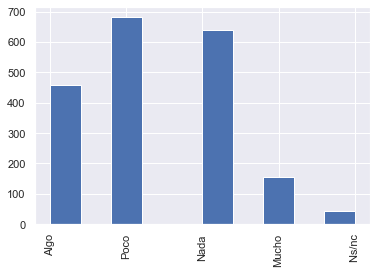

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Confianza_redes_sociales
Poco      643
Nada      583
Algo      457
Mucho     248
 Ns/nc     49
Name: Confianza_redes_sociales, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


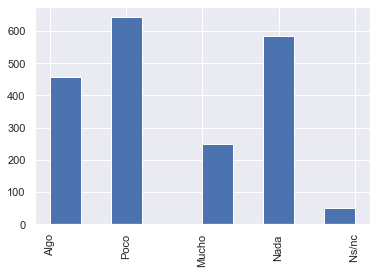

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Confianza_Cámara_de_Diputados
Nada      633
Poco      608
Algo      468
Mucho     204
 Ns/nc     67
Name: Confianza_Cámara_de_Diputados, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


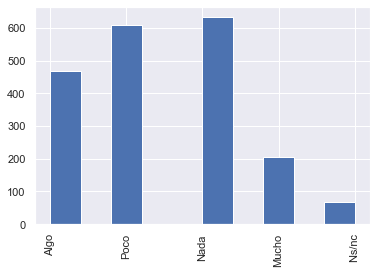

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Confianza_Guardia_nacional
Mucho     540
Poco      539
Algo      510
Nada      340
 Ns/nc     51
Name: Confianza_Guardia_nacional, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


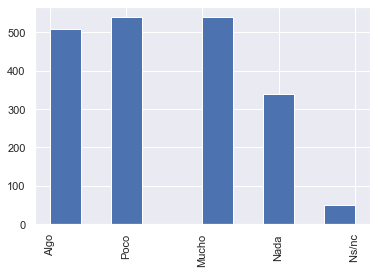

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Confianza_ejército
Mucho     708
Algo      527
Poco      477
Nada      234
 Ns/nc     34
Name: Confianza_ejército, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


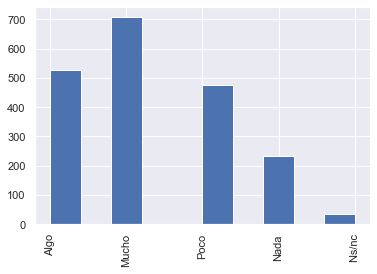

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Confianza_polícía
Nada      864
Poco      557
Algo      388
Mucho     143
 Ns/nc     28
Name: Confianza_polícía, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


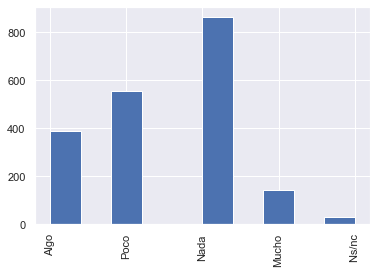

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Confianza_jueces
Nada      661
Poco      620
Algo      480
Mucho     169
 Ns/nc     50
Name: Confianza_jueces, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


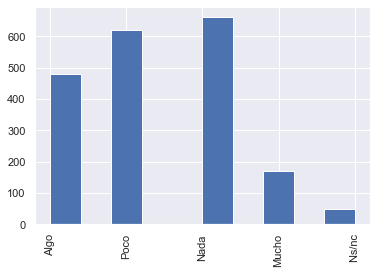

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Utiliza_internet
Sí       1473
No        506
Ns/nc       1
Name: Utiliza_internet, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


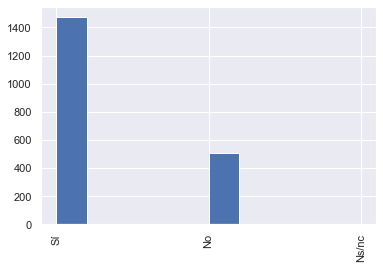

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Utilizó_twitter
No       1767
Sí        206
Ns/nc       7
Name: Utilizó_twitter, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


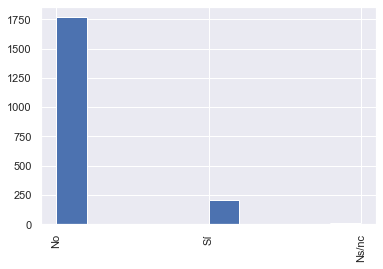

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Utilizó_Facebook
Sí       1290
No        687
Ns/nc       3
Name: Utilizó_Facebook, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


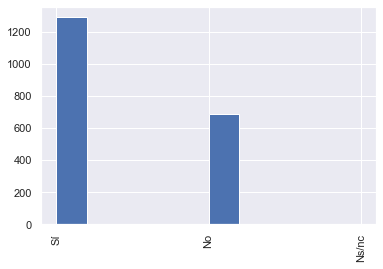

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Utilizó_Instagram
No       1468
Sí        505
Ns/nc       7
Name: Utilizó_Instagram, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


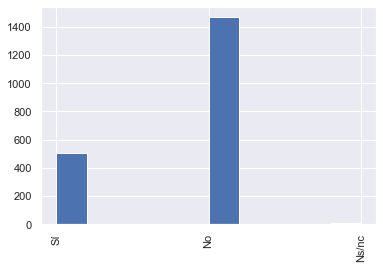

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Utilizó_Youtube
Sí       1224
No        751
Ns/nc       5
Name: Utilizó_Youtube, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


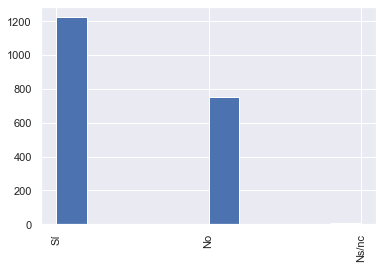

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Utilizó_Whatsapp
Sí       1521
No        458
Ns/nc       1
Name: Utilizó_Whatsapp, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


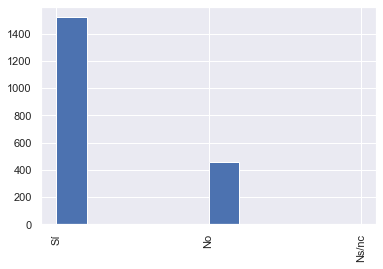

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Beneficiario_programa_social
No       1695
Sí        283
Ns/nc       2
Name: Beneficiario_programa_social, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


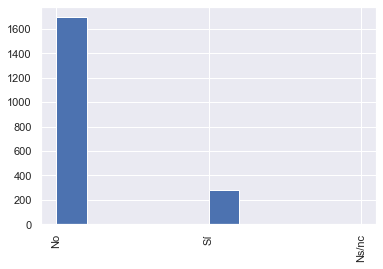

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Escolaridad
Secundaria completa           501
Preparatoria completa         394
Primaria completa             254
Licenciatura completa         249
Primaria incompleta           141
Licenciatura incompleta       105
Preparatoria incompleta        97
Carrera técnica completa       75
Secundaria incompleta          74
Nada                           65
Posgrado                       14
Carrera técnica incompleta      9
No responde                     2
Name: Escolaridad, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


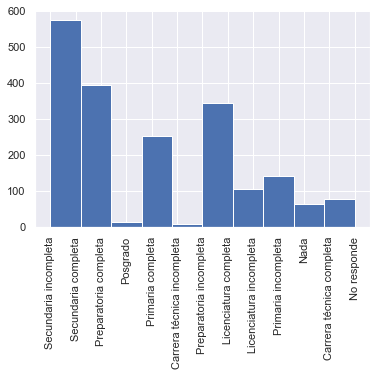

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Ocupación
Ama de casa                                717
Trabajador por cuenta propia               301
Trabajador en sector privado               261
Comerciante                                154
Estudiante                                 102
Otra (especificar)                          98
Trabajador en el gobierno                   90
Jubilado o pensionado                       80
Desempleado                                 65
Profesionista independiente                 55
Ama de casa con trabajo de medio tiempo     45
 No responde                                 7
Empresario                                   5
Name: Ocupación, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


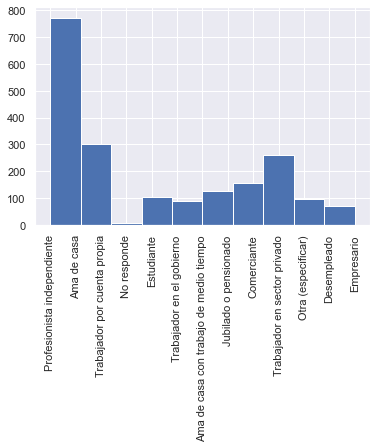

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Estado_civil
Casada/o        906
Soltera/o       577
Unión Libre     316
Viuda/o         111
Divorciada/o     64
No responde       6
Name: Estado_civil, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


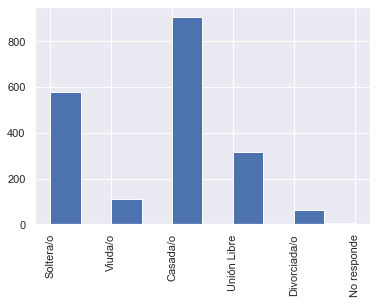

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  Tiene_hijos
Sí       1534
No        444
Ns/nc       2
Name: Tiene_hijos, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


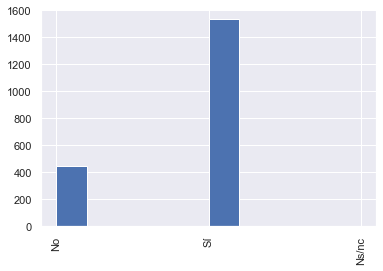

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Nombre de Columna:  AMAI-Cuartos
2               586
3               572
4               331
1               198
5               150
6                67
7 o mas          47
 No contesta     29
Name: AMAI-Cuartos, dtype: int64


TypeError: '<=' not supported between instances of 'int' and 'str'

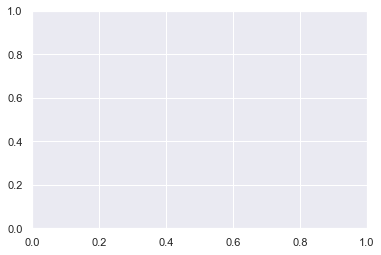

In [32]:
for columna in df_categ.columns:
    print(f'Nombre de Columna: ', columna)
    print(df_categ[columna].value_counts())
    print(df_categ[columna].hist(xrot=90))
    plt.show()
    print('~~~'*20)

In [33]:
df_categ_dummies = pd.get_dummies(df_categ)
df_categ_dummies.head()

,Estado_AGUASCALIENTES,Estado_BAJA CALIFORNIA,Estado_BAJA CALIFORNIA SUR,Estado_CAMPECHE,Estado_CDMX,Estado_CHIAPAS,Estado_CHIHUAHUA,Estado_COAHUILA,Estado_COLIMA,Estado_DURANGO,...,Ecolaridad_jefe_de_familia_Licenciatura Completa,Ecolaridad_jefe_de_familia_Licenciatura Incompleta,Ecolaridad_jefe_de_familia_No contesta,Ecolaridad_jefe_de_familia_No estudió,Ecolaridad_jefe_de_familia_Preparatoria Completa,Ecolaridad_jefe_de_familia_Preparatoria Incompleta,Ecolaridad_jefe_de_familia_Primaria Completa,Ecolaridad_jefe_de_familia_Primaria Incompleta,Ecolaridad_jefe_de_familia_Secundaria Completa,Ecolaridad_jefe_de_familia_Secundaria Incompleta
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
data = pd.concat([df_num, df_categ_dummies], axis=1)

In [35]:
data.head()

,Edad,Aprovación_presidencial_codificado,Aprovación_gobernador_codificado,Voto_en_2018_codificado,PAN_Percepción_codificado,PRI_Percepción_codificado,PRD_Percepción_codificado,PV_Percepción_codificado,PT_Percepción_codificado,MC_Percepción_codificado,...,Ecolaridad_jefe_de_familia_Licenciatura Completa,Ecolaridad_jefe_de_familia_Licenciatura Incompleta,Ecolaridad_jefe_de_familia_No contesta,Ecolaridad_jefe_de_familia_No estudió,Ecolaridad_jefe_de_familia_Preparatoria Completa,Ecolaridad_jefe_de_familia_Preparatoria Incompleta,Ecolaridad_jefe_de_familia_Primaria Completa,Ecolaridad_jefe_de_familia_Primaria Incompleta,Ecolaridad_jefe_de_familia_Secundaria Completa,Ecolaridad_jefe_de_familia_Secundaria Incompleta
0,33,4,4,1,4,1,1,2,1,2,...,0,0,0,0,0,0,0,0,0,1
1,22,3,3,97,3,2,1,3,3,3,...,0,0,0,0,0,0,0,0,0,1
2,67,2,2,1,3,2,0,0,0,2,...,0,0,0,0,1,0,0,0,0,0
3,38,4,3,1,3,2,3,2,2,2,...,0,0,0,0,0,0,0,0,1,0
4,35,2,1,5,2,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Regresión Lineal 

In [36]:
X = data.drop(columns='Aprovación_presidencial_codificado')
y = data[['Aprovación_presidencial_codificado']]

In [37]:
X.head()

,Edad,Aprovación_gobernador_codificado,Voto_en_2018_codificado,PAN_Percepción_codificado,PRI_Percepción_codificado,PRD_Percepción_codificado,PV_Percepción_codificado,PT_Percepción_codificado,MC_Percepción_codificado,PES_Percepción_codificado,...,Ecolaridad_jefe_de_familia_Licenciatura Completa,Ecolaridad_jefe_de_familia_Licenciatura Incompleta,Ecolaridad_jefe_de_familia_No contesta,Ecolaridad_jefe_de_familia_No estudió,Ecolaridad_jefe_de_familia_Preparatoria Completa,Ecolaridad_jefe_de_familia_Preparatoria Incompleta,Ecolaridad_jefe_de_familia_Primaria Completa,Ecolaridad_jefe_de_familia_Primaria Incompleta,Ecolaridad_jefe_de_familia_Secundaria Completa,Ecolaridad_jefe_de_familia_Secundaria Incompleta
0,33,4,1,4,1,1,2,1,2,1,...,0,0,0,0,0,0,0,0,0,1
1,22,3,97,3,2,1,3,3,3,3,...,0,0,0,0,0,0,0,0,0,1
2,67,2,1,3,2,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0
3,38,3,1,3,2,3,2,2,2,2,...,0,0,0,0,0,0,0,0,1,0
4,35,1,5,2,2,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1584, 607)
(396, 607)
(1584, 1)
(396, 1)


In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
model.intercept_

array([1.99998773])

In [42]:
print(model.coef_)

[[ 8.37440773e-17  8.17875742e-07 -1.50143041e-09 -1.51370021e-06
   2.98676372e-06 -3.00008143e-06 -2.16393743e-07  2.50241027e-06
   1.33163733e-06  1.14179019e-06  9.25051410e-07 -1.44247411e-06
   2.76954389e-08 -2.27985158e-06 -1.47778680e-06 -1.62115571e-06
   8.83310137e-07  8.60425370e-07  1.68658729e-06 -2.35354392e-06
   3.33238741e-06  9.14811782e-07  4.87592185e-07 -3.43537509e-09
  -1.99921513e-09  7.18695401e-10 -2.28393037e-08 -2.01356863e-09
  -6.45321632e-09 -2.17119454e-07  2.77663985e-07  6.84366428e-08
   1.46729314e-07  1.58826284e-08 -1.17417391e-07  2.07063041e-07
   1.42959542e-07  6.50782092e-08 -3.37890410e-09 -7.83123635e-09
  -3.32073875e-08 -6.71066084e-09  1.62704101e-09  3.99763062e-08
  -4.89419200e-09  4.14082038e-09  1.47945743e-09  1.79628689e-10
   1.29819457e-08  4.79141106e-08 -1.89717467e-07 -2.22340369e-07
  -1.85045975e-07 -7.66342786e-08 -1.86265432e-08 -7.66342846e-08
   1.26258875e-07  3.53169299e-08 -8.16348587e-09  6.48542376e-08
   2.37824

In [43]:
betas = model.coef_.flatten()
betas[:10]

array([ 8.37440773e-17,  8.17875742e-07, -1.50143041e-09, -1.51370021e-06,
        2.98676372e-06, -3.00008143e-06, -2.16393743e-07,  2.50241027e-06,
        1.33163733e-06,  1.14179019e-06])

In [44]:
df_betas = pd.DataFrame(betas, index=data.drop('Aprovación_presidencial_codificado', axis=1).columns,
                        columns=['Betas'])
df_betas

,Betas
Edad,8.374408e-17
Aprovación_gobernador_codificado,8.178757e-07
Voto_en_2018_codificado,-1.501430e-09
PAN_Percepción_codificado,-1.513700e-06
PRI_Percepción_codificado,2.986764e-06
...,...
Ecolaridad_jefe_de_familia_Preparatoria Incompleta,9.835734e-08
Ecolaridad_jefe_de_familia_Primaria Completa,9.835736e-08
Ecolaridad_jefe_de_familia_Primaria Incompleta,9.835737e-08
Ecolaridad_jefe_de_familia_Secundaria Completa,9.835735e-08


In [45]:
y_train_predict = model.predict(X_train)

In [46]:
y_train_predict

array([[2.],
       [1.],
       [3.],
       ...,
       [4.],
       [3.],
       [3.]])

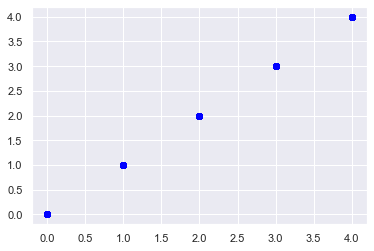

In [47]:
sns.set()
plt.scatter(y_train_predict, y_train, c='blue');

In [48]:
y_train.values.flatten()

array([2, 1, 3, ..., 4, 3, 3], dtype=int64)

In [49]:
df_y = pd.DataFrame(zip(y_train.values.flatten(), y_train_predict.flatten()),
                    columns=['y_real', 'y_predicha'])
df_y.head(10)

,y_real,y_predicha
0,2,2.0
1,1,1.0
2,3,3.0
3,3,3.0
4,2,2.0
5,2,2.0
6,4,4.0
7,3,3.0
8,3,3.0
9,3,3.0


In [50]:
df_y['error'] = df_y['y_real'] - df_y['y_predicha']
df_y.head()

,y_real,y_predicha,error
0,2,2.0,5.107026e-15
1,1,1.0,3.264056e-14
2,3,3.0,-5.728751e-14
3,3,3.0,-5.462297e-14
4,2,2.0,-5.773160e-15


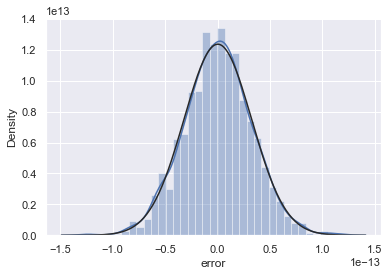

In [51]:
sns.distplot(df_y['error'], fit=norm);

In [52]:
mean_squared_error(y_train, y_train_predict) # Entre más se acerque a cero mejor

1.0416039522861678e-27

In [53]:
model.score(X_train, y_train)

1.0

## Top de nuestros datos

In [54]:
X = data[columnas_top_10].drop('Aprovación_presidencial_codificado', axis=1)
y = data['Aprovación_presidencial_codificado']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
intercept = model.intercept_
intercept

0.9521582956342984

In [58]:
coef = model.coef_
coef

array([ 0.36949964,  0.24811193,  0.0848002 ,  0.03077474,  0.02285578,
       -0.0120305 ,  0.05018084,  0.0025565 , -0.05435674])

In [59]:
X.iloc[:, 1].values

array([4, 3, 2, ..., 3, 1, 3], dtype=int64)

In [60]:
y_ = intercept + coef[0]*(X.iloc[:, 0].values) + coef[1]*(X.iloc[:, 1].values) 
y_

array([2.31410566, 2.43549337, 2.55688107, ..., 2.80499301, 1.9392695 ,
       2.80499301])

In [61]:
beta_x = [coef[i]*(X.iloc[:, i].values) for i in range(9)]
beta_x

[array([0.36949964, 0.73899928, 1.10849891, ..., 1.10849891, 0.73899928,
        1.10849891]),
 array([0.99244773, 0.7443358 , 0.49622386, ..., 0.7443358 , 0.24811193,
        0.7443358 ]),
 array([0.2544006, 0.2544006, 0.1696004, ..., 0.0848002, 0.3392008,
        0.0848002]),
 array([0.03077474, 0.06154948, 0.03077474, ..., 0.09232423, 0.03077474,
        0.03077474]),
 array([0.06856733, 0.06856733, 0.04571155, ..., 0.04571155, 0.0914231 ,
        0.04571155]),
 array([-0.0120305 , -0.03609151, -0.        , ..., -0.03609151,
        -0.02406101, -0.02406101]),
 array([0.05018084, 0.05018084, 0.        , ..., 0.10036169, 0.10036169,
        0.05018084]),
 array([0.00766949, 0.00766949, 0.00511299, ..., 0.0025565 , 0.00766949,
        0.0025565 ]),
 array([-0.05435674, -0.10871347, -0.16307021, ..., -0.16307021,
        -0.05435674, -0.10871347])]

In [62]:
df_betas = pd.DataFrame(beta_x)
df_betas

,0,1,2,3,4,5,6,7,8,9,...,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
0,0.369500,0.738999,1.108499,1.108499,0.369500,0.369500,0.369500,1.108499,0.369500,0.369500,...,0.369500,1.108499,0.738999,1.108499,1.108499,0.000000,0.369500,1.108499,0.738999,1.108499
1,0.992448,0.744336,0.496224,0.744336,0.248112,0.496224,0.744336,0.744336,0.248112,0.248112,...,0.248112,0.248112,0.744336,0.248112,0.000000,0.000000,0.744336,0.744336,0.248112,0.744336
2,0.254401,0.254401,0.169600,0.339201,0.169600,0.254401,0.169600,0.339201,0.169600,0.169600,...,0.763202,0.169600,0.169600,0.169600,0.339201,0.084800,0.254401,0.084800,0.339201,0.084800
3,0.030775,0.061549,0.030775,0.030775,0.030775,0.030775,0.030775,0.030775,0.030775,0.030775,...,0.092324,0.061549,0.092324,0.030775,0.092324,0.030775,0.030775,0.092324,0.030775,0.030775
4,0.068567,0.068567,0.045712,0.045712,0.045712,0.022856,0.022856,0.091423,0.045712,0.022856,...,0.205702,0.068567,0.045712,0.045712,0.022856,0.022856,0.068567,0.045712,0.091423,0.045712
5,-0.012031,-0.036092,-0.000000,-0.024061,-0.000000,-0.024061,-0.024061,-0.000000,-0.024061,-0.024061,...,-0.036092,-0.024061,-0.036092,-0.000000,-0.000000,-0.000000,-0.012031,-0.036092,-0.024061,-0.024061
6,0.050181,0.050181,0.000000,0.150543,0.100362,0.100362,0.100362,0.150543,0.000000,0.150543,...,0.100362,0.100362,0.150543,0.150543,0.000000,0.150543,0.200723,0.100362,0.100362,0.050181
7,0.007669,0.007669,0.005113,0.010226,0.005113,0.007669,0.002556,0.010226,0.002556,0.005113,...,0.023008,0.007669,0.002556,0.005113,0.007669,0.002556,0.002556,0.002556,0.007669,0.002556
8,-0.054357,-0.108713,-0.163070,-0.054357,-0.054357,-0.054357,-0.054357,-0.108713,-0.163070,-0.054357,...,-0.000000,-0.108713,-0.108713,-0.108713,-0.163070,-0.054357,-0.000000,-0.163070,-0.054357,-0.108713


In [63]:
df_betas.shape

(9, 1980)

In [64]:
df_betas['y'] = df_betas.sum(axis=0) + intercept

In [66]:
df_betas.head()

,0,1,2,3,4,5,6,7,8,9,...,1971,1972,1973,1974,1975,1976,1977,1978,1979,y
0,0.369500,0.738999,1.108499,1.108499,0.369500,0.369500,0.369500,1.108499,0.369500,0.369500,...,1.108499,0.738999,1.108499,1.108499,0.000000,0.369500,1.108499,0.738999,1.108499,2.659311
1,0.992448,0.744336,0.496224,0.744336,0.248112,0.496224,0.744336,0.744336,0.248112,0.248112,...,0.248112,0.744336,0.248112,0.000000,0.000000,0.744336,0.744336,0.248112,0.744336,2.733056
2,0.254401,0.254401,0.169600,0.339201,0.169600,0.254401,0.169600,0.339201,0.169600,0.169600,...,0.169600,0.169600,0.169600,0.339201,0.084800,0.254401,0.084800,0.339201,0.084800,2.645011
3,0.030775,0.061549,0.030775,0.030775,0.030775,0.030775,0.030775,0.030775,0.030775,0.030775,...,0.061549,0.092324,0.030775,0.092324,0.030775,0.030775,0.092324,0.030775,0.030775,3.303031
4,0.068567,0.068567,0.045712,0.045712,0.045712,0.022856,0.022856,0.091423,0.045712,0.022856,...,0.068567,0.045712,0.045712,0.022856,0.022856,0.068567,0.045712,0.091423,0.045712,1.866974


In [65]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [67]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.31144661653337136, 0.32142429848127685)

In [68]:
mean_squared_error(y_train, y_train_predict)

0.9705987524785846

In [69]:
mean_squared_error(y_test, y_test_predict)

0.9402853384680929

## Prueba Z

In [70]:
Mujer_Aprovación = df[df['Sexo']== 'Femenino']['Aprovación_presidencial_codificado']
Hombre_Aprovación = df[df['Sexo']== 'Masculino']['Aprovación_presidencial_codificado']

<AxesSubplot:ylabel='Density'>

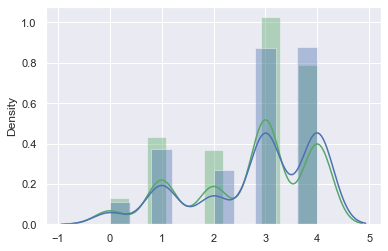

In [71]:
plt.figure()
sns.distplot(x=Mujer_Aprovación, kde=True, color='g')
sns.distplot(x=Hombre_Aprovación, kde=True, color='b')

In [72]:
aprovacion_presi = df['Aprovación_presidencial_codificado']

<AxesSubplot:ylabel='Density'>

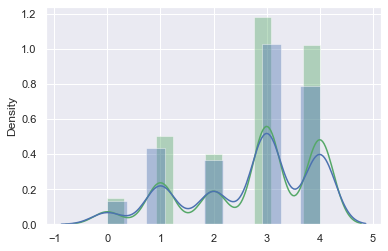

In [73]:
plt.figure()
sns.distplot(x=aprovacion_presi, kde=True, color='g')
sns.distplot(x=Mujer_Aprovación, kde=True, color='b')

In [74]:
df.describe()

,Edad,Aprovación_presidencial_codificado,Aprovación_gobernador_codificado,Voto_en_2018_codificado,PAN_Percepción_codificado,PRI_Percepción_codificado,PRD_Percepción_codificado,PV_Percepción_codificado,PT_Percepción_codificado,MC_Percepción_codificado,...,Utilizó_twitter_codificado,Utilizó_Facebook_codificado,Utilizó_Instagram_codificado,Utilizó_Youtube_codificado,Utilizó_Whatsapp_codificado,Beneficiario_codificado,Escolaridad_codificado,Ocupación_codificado,Estado_civil_codificado,Tiene_hijos_codificado
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,...,1980.00000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,41.748485,2.743434,2.188384,30.548485,2.088384,1.998485,1.878788,1.953030,1.843434,1.798990,...,0.45404,0.801515,0.605051,0.868182,0.818182,0.242929,6.137374,6.560606,2.394949,1.323232
std,16.223065,1.185576,1.179395,42.080053,0.928884,0.877256,0.972827,1.081479,1.126973,1.188627,...,5.87923,3.855723,5.878471,4.962548,2.247512,3.160532,4.128962,6.277792,5.427325,3.134603
min,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,2.000000,1.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,1.000000,1.000000
50%,40.000000,3.000000,2.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000,5.000000,8.000000,2.000000,1.000000
75%,53.000000,4.000000,3.000000,97.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,7.000000,8.000000,3.000000,1.000000
max,88.000000,4.000000,4.000000,99.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [75]:
from statsmodels.stats.weightstats import ztest

In [76]:
mujer = df[df['Sexo'] == 'Femenino']['Aprovación_presidencial_codificado']

In [77]:
ztest(mujer, value=2.74) # z_score, p-value 

(-1.346451035873808, 0.17815710125680595)

In [78]:
youtube = df[df['Utilizó_Youtube']== 'Sí']['Confianza_INE_codificado']

In [79]:
ztest(youtube, value=2.65)

(-2.0027225722604896, 0.04520707459703069)

In [80]:
youtube = df[df['Utilizó_Youtube']== 'Sí']['Confianza_TRIFE_codificado']

In [81]:
ztest(youtube, value=2.60)

(-2.3644508545159675, 0.01805682292292037)

In [82]:
df['Confianza_TRIFE_codificado'].mean()

2.602020202020202

In [ ]:
list(df.columns)

## Agrupo por estado la aprovación presidencial

In [ ]:
por_estado= df.groupby('Estado').agg({'Aprovación_presidencial_codificado':'mean',}).sort_values('Aprovación_presidencial_codificado')


In [ ]:
etiquetas_mpg = ['Alta', 'Media', 'Baja']
bins = pd.cut(por_estado['Aprovación_presidencial_codificado'], 3, labels=etiquetas_mpg, retbins=True)

bins

In [ ]:
 'Confianza_INE'

In [ ]:
df[ 'MORENA_Percepción'].unique()

In [ ]:
df['Nivel_de_Participación'].unique()

In [ ]:
No_sabe = df[df.Nivel_de_Participación.isin(['No Responde', 'No sabe'])]

In [ ]:
No_sabe.info()

In [ ]:
Altamente_probable = df[df.Nivel_de_Participación.isin(['Estoy totalmente seguro/a de ir a votar', 'Es altamente probable que vaya a votar'])]
Altamente_probable

In [ ]:
Altamente_probable.to_excel(r'C:/Users/Juan Carlos/Desktop/apuntes/Si_votaría.xlsx', index = False)

In [ ]:
Poco_Probable = df[df.Nivel_de_Participación.isin(['Es poco probable que vaya a votar', 'Es poco probable que vaya a votar'])]

In [ ]:
Poco_Probable.info()

In [ ]:
from scipy.stats import bernoulli

In [ ]:
x = [1, 0]
p = 0.3
plt.figure(facecolor='w')
plt.bar(x, bernoulli.pmf(x, p), width=0.1, color=['r', 'g'])
plt.title('Percepción PAN')
plt.xlabel('Exito o Fracaso')
plt.ylabel('Probabilidad')

In [ ]:
x = [1, 0]
p = 0.3642
plt.figure(facecolor='w')
plt.bar(x, bernoulli.pmf(x, p), width=0.1, color=['b', 'black'])
plt.title('Percepción PAN')
plt.xlabel('No favorable/Favorable')
plt.ylabel('Nivel de aceptación')

In [ ]:
x = [1, 0]
p = 0.2808
plt.figure(facecolor='w')
plt.bar(x, bernoulli.pmf(x, p), width=0.1, color=['r', 'black'])
plt.title('Percepción PRI')
plt.xlabel('No favorable/Favorable')
plt.ylabel('Nivel de aceptación')

In [ ]:
x = [1, 0]
p = 0.2111
plt.figure(facecolor='w')
plt.bar(x, bernoulli.pmf(x, p), width=0.1, color=[ 'y', 'black'])
plt.title('Percepción PRD')
plt.xlabel('No favorable/Favorable')
plt.ylabel('Nivel de aceptación')

In [ ]:
x = [1, 0]
p = 0.1191
plt.figure(facecolor='w')
plt.bar(x, bernoulli.pmf(x, p), width=0.1, color=[ 'g', 'black'])
plt.title('Percepción Partido Verde')
plt.xlabel('No favorable/Favorable')
plt.ylabel('Nivel de aceptación')


In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
x = [1, 0]
p = 0.5833
axs[0].bar(x, bernoulli.pmf(x, p), width=0.1, color=[ 'w', 'black'])
axs[0].set_title('Percepción MORENA')
axs[0].set_xlabel('No favorable/Favorable')
axs[0].set_ylabel('Nivel de aceptación')

x = [1, 0]
p = 0.3642
axs[1].bar(x, bernoulli.pmf(x, p), width=0.1, color=['b', 'black'])
axs[1].set_title('Percepción PAN')
axs[1].set_xlabel('No favorable/Favorable')
axs[1].set_ylabel('Nivel de aceptación')

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
x = [1, 0]
p = 0.2808
axs[0].bar(x, bernoulli.pmf(x, p), width=0.1, color=[ 'r', 'black'])
axs[0].set_title('Percepción PRI')
axs[0].set_xlabel('No favorable/Favorable')
axs[0].set_ylabel('Nivel de aceptación')

x = [1, 0]
p = 0.2111
axs[1].bar(x, bernoulli.pmf(x, p), width=0.1, color=['y', 'black'])
axs[1].set_title('Percepción PRD')
axs[1].set_xlabel('No favorable/Favorable')
axs[1].set_ylabel('Nivel de aceptación')

In [ ]:
corr2 = df.corr()

In [ ]:
sns.set()

fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(round(corr2, 2), annot=True, ax=ax, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
fig.subplots_adjust(top=0.93)
fig.suptitle('Mapa de Correlaciones');

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(25, 10))
  sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
              fmt='.2f', linewidths=0.5, mask=mask)
  fig.subplots_adjust(top=0.93)
  fig.suptitle('Mapa de Correlaciones')

In [ ]:
n_columnas = 15
columnas = corr.nlargest(n_columnas, 'Beneficiario_codificado')['Beneficiario_codificado'].index
columnas

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
df['Nivel_de_Participación']